<a href="https://colab.research.google.com/github/eduardo20/Cordova-Examples/blob/master/final_ROC_todos_calsificadores.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
#%%timeit
from google.colab import files
import sys
sys.path.append('/content/drive/My Drive')
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
import matplotlib as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
!pip install ipynb
import ipynb.fs.full.my_functions_c as mf
#from ipynb.fs.full.my_functions import Snippet_188_a, Snippet_191,Snippet_192,Snippet_190, ROC_
#from ipynb.fs.full.my_functions import load_clean
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

#Cargamos los datos

---



In [0]:
features_=[ 'HR12', 'HR23', 'HR34', 'P_E_lg', 'gamm_log', 'Ts_log',  'spectral_index','source_type']
     
#----------------------------------------------------------------------#
# Carga el dataframe de la poblacion, lo devuelve limpio, separadas las caracteristicas (X sin normalizar, X_std normalizadas) de las etiquetas (y_) más una copia completa del dataframe df0
# Sintaxis:
# X,y_,df0,X_std=load_clean(poblacion(int),features del modelo[lista]) 
X, y_, df0, X_std=mf.load_clean(3,features_)
#----------------------------------------------------------------------#
X_train, X_test, y_train, y_test = train_test_split(X_std, y_, test_size=0.3)
print ("nº de características del modelo :",len(features_)-1)
#cargamos los datos a predecir


Cargando full
(1717, 57)
nº de características del modelo : 7


In [0]:

features_=[ 'flux_1_100_gev', 'spectral_index', 
          'detection_significance', 'pivot_energy', 'flux_density',
          'energy_flux',
          'curve_significance', 'spectrum_type', 'powerlaw_index',
          'flux_100_300_mev', 'nufnu_100_300_mev', 'sqrt_ts_100_300_mev',
          'flux_0p3_1_gev', 'flux_0p3_1_gev_neg_err',
          'nufnu_0p3_1_gev', 'sqrt_ts_0p3_1_gev', 'flux_1_3_gev',
          'nufnu_1_3_gev','sqrt_ts_1_3_gev', 'flux_3_10_gev', 'nufnu_3_10_gev',
          'sqrt_ts_3_10_gev', 'flux_10_100_gev', 'nufnu_10_100_gev',
          'sqrt_ts_10_100_gev', 'variability_index', 'significance_peak',
          'flux_peak', 'flux_peak_error', 'time_peak', 'time_peak_interval',
          'source_type', 'analysis_flags', 'HR12', 'HR23', 'HR34', 'hard_slope',
          'soft_slope', 'P_E_lg', 'TS_', 'sig_', 'gamm_log', 'Ts_log', 'sig_log',
          'F100_log']
import pandas as pd
import numpy as np



corr = X.corr().round(2)
#corr = corr.round(2)
corr
corr.style.background_gradient(cmap='coolwarm')
# 'RdBu_r' & 'BrBG' are other good diverging colormaps


,HR12,HR23,HR34,P_E_lg,gamm_log,Ts_log,spectral_index
HR12,1.000000,0.070000,0.140000,0.350000,-0.360000,-0.150000,-0.360000
HR23,0.070000,1.000000,0.230000,0.560000,-0.590000,-0.220000,-0.570000
HR34,0.140000,0.230000,1.000000,0.610000,-0.590000,-0.360000,-0.580000
P_E_lg,0.350000,0.560000,0.610000,1.000000,-0.840000,-0.470000,-0.830000
gamm_log,-0.360000,-0.590000,-0.590000,-0.840000,1.000000,0.430000,1.000000
Ts_log,-0.150000,-0.220000,-0.360000,-0.470000,0.430000,1.000000,0.430000
spectral_index,-0.360000,-0.570000,-0.580000,-0.830000,1.000000,0.430000,1.000000


In [0]:

clase='source_type'
#print(df['ra']) 
archivo_fermi='/content/drive/My Drive/FERMI3FGL4Y_short.xls'
#df_bl = df_bl.loc[(df_bl[clase] == 'bcu')]
pd.set_option("display.max_columns", 73) # ver el numero de columnas en este caso 73
df = pd.read_excel(archivo_fermi, sheet_name='fermi3fgl')

#df['spectrum_type'].apply(pd.Series).stack().value_counts()
#df0.describe().to_excel('/content/drive/My Drive/df0_statistics.xlsx')
features_=[ 'HR12', 'HR23', 'HR34', 'P_E_lg', 'gamm_log', 'Ts_log',  'spectral_index','source_type']
df=df0[features_]         


df_bl = df.loc[(df['source_type'] == 2)  ]
print(df_bl.shape)
df_bl.describe().to_excel('/content/drive/My Drive/bcu_statistics.xlsx')
df_bl.describe(include='all')


(573, 8)


,HR12,HR23,HR34,P_E_lg,gamm_log,Ts_log,spectral_index,source_type
count,573.000000,573.000000,573.000000,573.000000,573.000000,573.000000,573.000000,573.0
mean,-0.424167,-0.508767,-0.495060,3.238094,0.335794,0.880217,2.190920,2.0
std,0.561909,0.428585,0.287437,0.377182,0.065860,0.182707,0.318756,0.0
min,-0.999998,-0.999920,-0.999981,2.470616,0.053946,0.331058,1.132260,2.0
25%,-0.768568,-0.745389,-0.685077,2.943964,0.293188,0.771407,1.964210,2.0
50%,-0.624860,-0.631527,-0.558690,3.213239,0.341757,0.868413,2.196630,2.0
75%,-0.378446,-0.461541,-0.364341,3.501362,0.383237,0.984023,2.416780,2.0
max,0.999952,0.999959,0.999938,4.570566,0.479865,1.756134,3.019010,2.0


In [0]:
X_train.shape
df_UNK=pd.read_excel('/content/drive/My Drive/tree_UNK.xlsx')

df_UNK_W=df_UNK[features_]

df_UNK_W.drop(columns=['source_type'], axis=1).shape
#print(type(df_UNK))
sc = StandardScaler()
sc.fit(df_UNK_W)
df_pre_std = sc.transform(df_UNK_W)

C = np.delete(df_pre_std, 7, 1)
print(C[0])
#df_UNK


[-0.37758679 -0.74925656 -1.25691626 -1.87721537  0.22212706  1.62534683
  0.15674568]


#**Cargamos los modelos entrenados**

---



#Arbol de decision (tree)

In [0]:
import pickle
# Load from file
pkl_filename = "/content/drive/My Drive/tree(3-3)-pickle_model.pkl"
with open(pkl_filename, 'rb') as file:
    tree_model = pickle.load(file)
    print(tree_model)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=5, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


In [0]:
#CREAMOS DATAFRAME CON LOS OBJETOS CLASIFICADOS Y SUS NOMBRES
def salva_AGNs (archivo,df_UNK,df0):
    archivo='/content/drive/My Drive/'+archivo
    indices=df_UNK['Unnamed: 0'].tolist()

    import csv
    with open(archivo, "a", newline='') as fp:
      print('Salvando archivo :', archivo)
      cols_=['nombre','source_type','ra','dec']
      wr = csv.writer(fp, dialect='excel')
      wr.writerow(cols_)

      for ind_ in indices:
        st_=df_UNK.loc[(df_UNK['Unnamed: 0'] == ind_	)  , 'source_type']
        st_=st_.iloc[0]
        name_=df0.iloc[ind_]['name']
        ra_=df0.iloc[ind_]['ra']
        dec_=df0.iloc[ind_]['dec']
        #row_= [name_, st_, ra_, dec_]
        list1 = [name_,st_,ra_,dec_]
        wr = csv.writer(fp, dialect='excel')
        wr.writerow(list1)
    

salva_AGNs ('tree_output.csv',df_UNK,df0)

Salvando archivo : /content/drive/My Drive/tree_output.csv


#Logistic regression

In [0]:
pkl_filename = "/content/drive/My Drive/LR-pickle_model.pkl"
with open(pkl_filename, 'rb') as file:
    LR_model = pickle.load(file)
    print(LR_model)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


# Random Forest

In [0]:
pkl_filename = "/content/drive/My Drive/forest-pickle_model.pkl"
with open(pkl_filename, 'rb') as file:
    Forest_model = pickle.load(file)
    print(Forest_model)
    

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10000,
                       n_jobs=2, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)


#Support Vector Machine (SVM)

In [0]:
pkl_filename = "/content/drive/My Drive/svm-pickle_model.pkl"
with open(pkl_filename, 'rb') as file:
    SVM_model = pickle.load(file)
    print(SVM_model)

SVC(C=0.11, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=10.0, kernel='linear',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)


# Gradient Boosted (GBC)

In [0]:
pkl_filename = "/content/drive/My Drive/gbc-pickle_model.pkl"
with open(pkl_filename, 'rb') as file:
    GBC_model = pickle.load(file)
    print(GBC_model)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.11, loss='deviance', max_depth=4,
                           max_features=7, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=0.4, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


# Entended Boosted Trees (XGB)

In [0]:
pkl_filename = "/content/drive/My Drive/xg(1)-pickle_model.pkl"
with open(pkl_filename, 'rb') as file:
    XGB_model = pickle.load(file)
    print(XGB_model)

XGBClassifier(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3,
              feature_names=['HR12', 'HR23', 'HR34', 'P_E_lg', 'gamm_log',
                             'Ts_log', 'spectral_index'],
              gamma=0, learning_rate=0.21, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)


# Curvas ROC todos los modelos

---



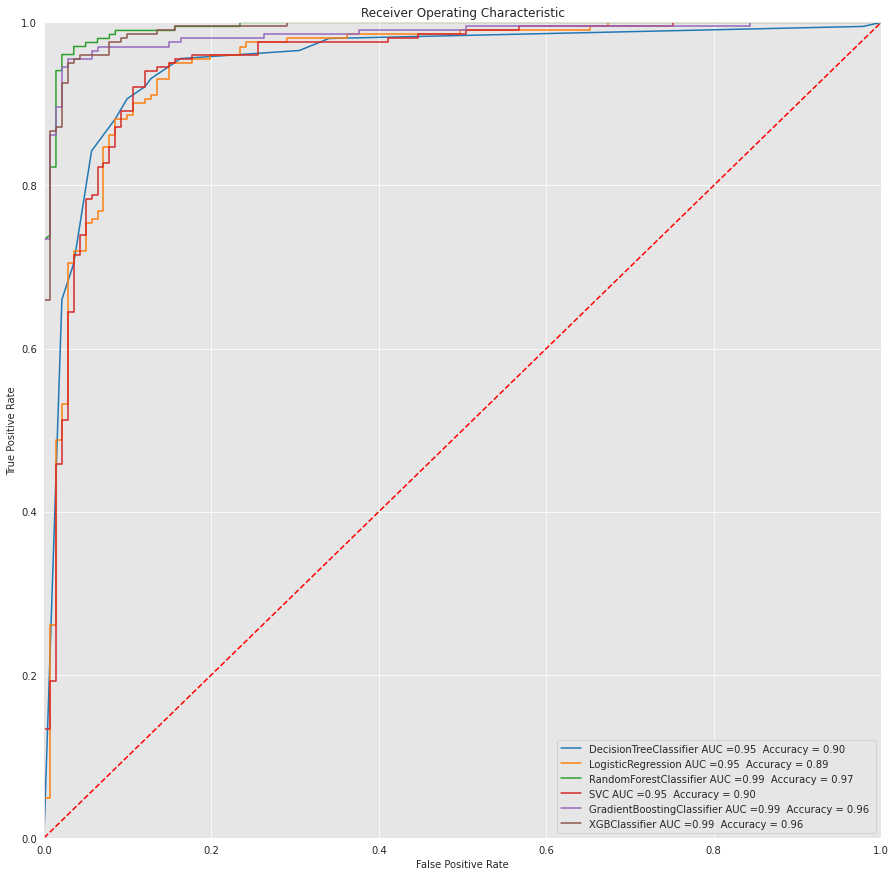

In [0]:
clasificadores=[tree_model,LR_model,Forest_model, SVM_model,GBC_model, XGB_model]
mf.ROC_multiple(clasificadores,X_test,y_test)

In [0]:

#[tree_model,LR_model,Forest_model, SVM_model,GBC_model, XGB_model]

#thres_ = [0.4343,0.2222,0.404,0.3636,0.4596,0.4848]



#thres_ = [0.835,0.2222,0.404,0.3636,0.918,0.488]
thres_ = [0.75,0.75,0.75,0.75,0.75,0.75]
#predicted_proba = classif_.predict_proba(C)
#predicted_5= classif_.predict(C)
#predicted = (predicted_proba [:,1] >= threshold).astype('int')
# RECUENTO DE CLASIFICACION
#print('Bl Lac = 1 -- FSRQ = 0 -- UNKNOWN = 2 ')

features_=[ 'HR12', 'HR23', 'HR34', 'P_E_lg', 'gamm_log', 'Ts_log',  'spectral_index','source_type']
df_UNK=df_UNK[features_]
df_UNK.head(5)
#Ypredict-predicted_5
contador=0
for c in clasificadores:
  threshold=thres_[contador]
  name =c.__class__.__name__
  predicted_proba = c.predict_proba(C)
  predicted_5= c.predict(C)

  predicted = (predicted_proba [:,1] >=  threshold).astype('int')
  df_UNK[name]=predicted
  #print("treshold :", threshold)
  #print("diferencias :", (predicted-predicted_5))
  contador=contador+1
contador=0
df_UNK 


,HR12,HR23,HR34,P_E_lg,gamm_log,Ts_log,spectral_index,source_type,DecisionTreeClassifier,LogisticRegression,RandomForestClassifier,SVC,GradientBoostingClassifier,XGBClassifier
0,-0.636151,-0.829607,-0.856029,2.530661,0.350411,1.176921,2.24084,2,0,0,0,0,0,0
1,-0.531969,-0.676626,-0.690423,2.765348,0.346232,1.233162,2.21938,2,0,0,0,0,0,0
2,-0.597125,-0.757815,-0.848617,2.515026,0.365434,1.573206,2.31971,2,0,0,0,0,0,0
3,-0.280541,-0.636407,-0.691235,2.854124,0.304796,1.157896,2.01742,2,0,0,0,0,0,0
4,-0.576720,-0.620531,-0.716050,2.585528,0.336402,1.360673,2.16971,2,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568,-0.713973,-0.686244,-0.495374,2.945789,0.371315,0.683932,2.35134,2,0,1,0,0,0,0
569,-0.665537,-0.533528,-0.705181,2.908539,0.401207,0.839203,2.51888,2,0,0,0,0,0,0
570,-0.318593,-0.744833,-0.438353,3.037626,0.357426,1.378916,2.27733,2,0,0,0,0,0,0
571,-0.960846,0.428015,-0.611846,3.675758,0.276749,0.861446,1.89125,2,1,1,1,1,1,1


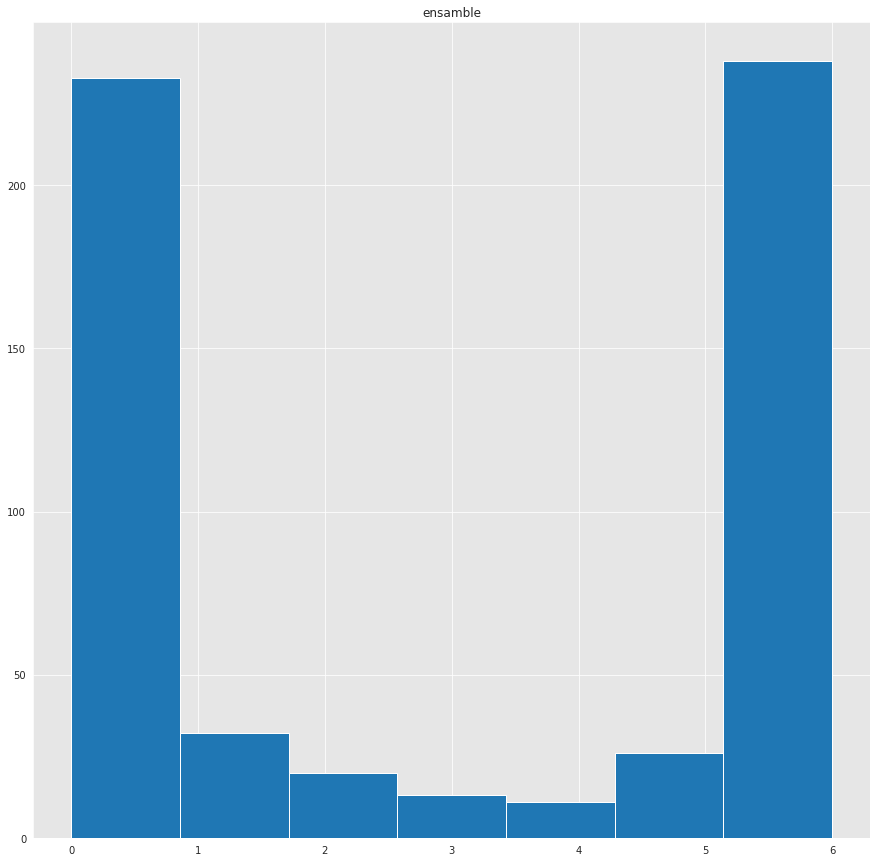

In [0]:
features_n=[ 'DecisionTreeClassifier',	'LogisticRegression',	'RandomForestClassifier',	'SVC',	'GradientBoostingClassifier',	'XGBClassifier']
df_pred=df_UNK[features_n]
df_pred['ensamble'] = df_pred.sum(axis=1)
#df_pred.head(5)
df_pred['ensamble'].apply(pd.Series).stack().value_counts()
df_UNK.to_excel('/content/drive/My Drive/df_UNK_clasificado-075.xlsx') 
#df_pred.shape
fig=df_pred.hist(column='ensamble', bins=7, align = 'mid')
#print(type(fig))

In [0]:
print(df_pred['ensamble'].apply(pd.Series).stack().value_counts())
for e in features_n:
  print(e)
  print(df_pred[e].apply(pd.Series).stack().value_counts())
df_pred.head(5)

## Grafico precision-recall para todos los clasificadores

In [0]:
def plot_pre_rec(clf,X_test,y_test,pre_,rec_,etiqueta):
  y_pred=clf.predict_proba(X_test)[:,1]
  precision , recall,thresholds,mcc,f1=mf.prec_rec(0,1,100,y_test,y_pred)
  plot_df = pd.DataFrame({'recall': recall, 'precision': precision, 'threshold': thresholds,'mcc':mcc, 'f1':f1})
  tmp_df=mf.rule_tresholds(pre_,rec_,plot_df, etiqueta)
  return tmp_df

for clf in clasificadores:
  etiqueta =clf.__class__.__name__
  tmp_df=plot_pre_rec(clf,X_test,y_test,0.4,0.4,etiqueta)  
  #scores = cross_val_score(clf, X_test, y_test, cv=2)
  #print(" %s Accuracy: %0.2f (+/- %0.2f)" % (etiqueta, scores.mean(), scores.std() * 2))

## Analisis individual ( 1 clasificador)  precision-recall

In [0]:
#--------------------------------------------------------------------------------
# Seleccionar uno de los siguientes modelos
#clasificadores=[tree_model,LR_model,Forest_model, SVM_model,GBC_model, XGB_model]
#---------------------------------------------------------------------------------
clasificadores=[SVM_model]
for clf in clasificadores:
  etiqueta =clf.__class__.__name__
  tmp_df=plot_pre_rec(clf,X_test,y_test,0.4,0.4,etiqueta)  

In [0]:
tmp_df

In [0]:
#y_test subconjunto d eetiquetas para entrenamiento.
#high_precision_threshold threshold para modelo centrado en precision
#high_recall_threshold threshold para modelo centrado en recall
from sklearn.metrics import f1_score, matthews_corrcoef
def prec_rec_thresholded(y_test,y_pred,high_precision_threshold,high_recall_threshold):
  y_pred_high_precision = np.zeros_like(y_test)
  y_pred_high_precision[y_pred >= high_precision_threshold] = 1
  y_pred_high_recall = np.zeros_like(y_test)
  y_pred_high_recall[y_pred >= high_recall_threshold] = 1
  return  y_pred_high_precision, y_pred_high_recall
  
y_pred=clf.predict_proba(X_test)[:,1]  
y_pred_hp,y_pred_hc=prec_rec_thresholded(y_test,y_pred,0.7,0.9)
#print(y_pred_hp)
#print("-------------------------------------------")
#print(y_pred_hc)
f1_score(y_test, y_pred_hp)
#f1_score(y_test, y_pred_hc)
tmp_df.head(98)


In [0]:
# reeturn el mayor valor de Mcc y obtener el treshold optimo
tmp_df.to_excel('/content/drive/My Drive/metricas_svm.xlsx')
tmp_df.loc[tmp_df['mcc'].idxmax()]

In [0]:
# reeturn el mayor valor de Mcc y de f1-score y obtener el treshold optimo
tmp_df.loc[tmp_df['f1'].idxmax()]

In [0]:

#fig = plt.figure()

plt.plot(tmp_df['f1'],tmp_df['mcc'])

plt.ylabel('f1-score')
plt.xlabel('mcc')
#fig = plt.figure(figsize=(10,6))
plt.grid(axis='both')


m_f1=max(tmp_df['f1'])
m_mcc=max(tmp_df['mcc'])
print("maximo f1-score: ",m_f1)
print("maximo mcc: ",m_mcc)
id_f1 =tmp_df['f1'].argmax()
id_mcc =tmp_df['mcc'].argmax()
print(id_f1,id_mcc)
tmp_df['threshold'][46]

In [0]:
plt.grid()
#fig = plt.figure()

plt.plot(tmp_df['threshold'],tmp_df['f1'])
plt.plot(tmp_df['threshold'],tmp_df['mcc'])
plt.ylabel(' mcc - f1')
plt.xlabel('threshold')

fig = plt.figure(figsize=(10,6))
plt.show()



In [0]:
# compute the metrics for the two points
high_precision_threshold = tmp_df.loc[9, 'threshold']
high_recall_threshold = tmp_df.loc[20, 'threshold']
print(high_precision_threshold, high_recall_threshold)


In [0]:
# let us compute the metrics for these thresholds

y_pred_high_precision = np.zeros_like(y_test)
y_pred_high_precision[y_pred >= high_precision_threshold] = 1
y_pred_high_recall = np.zeros_like(y_test)
y_pred_high_recall[y_pred >= high_recall_threshold] = 1

In [0]:
y_pred_high_precision

In [0]:
from sklearn.metrics import f1_score, matthews_corrcoef

In [0]:
f1_score(y_test, y_pred_high_precision), f1_score(y_test, y_pred_high_recall)

# Metrica para la evaluación de los modelos

---



In [0]:
def multi_class_classification(clf,data_X,data_Y,cv):
    
    from sklearn.model_selection import cross_val_predict
    import sklearn.metrics as met

    #svc = svm.SVC(C=1, kernel='linear')
    # X_train, X_test, y_train, y_test = train_test_split( data_X, data_Y, test_size=0.4, random_state=0) 
    clf=clf
    #clf = svc.fit(data_X, data_Y) #svm
    # array = svc.coef_
    # print array
    predicted = cross_val_predict(clf, data_X, data_Y, cv=cv)
    print ("accuracy : ",met.accuracy_score(data_Y, predicted))
    print ("f1 score macro : ",met.f1_score(data_Y, predicted, average='macro')) 
    print ("f1 score micro : ",met.f1_score(data_Y, predicted, average='micro')) 
    print ("precision score : ",met.precision_score(data_Y, predicted, average='macro')) 
    print ("recall score : ",met.recall_score(data_Y, predicted, average='macro') )
    print ("hamming_loss : ",met.hamming_loss(data_Y, predicted))
    print ("jaccard_similarity_score : ", met.jaccard_similarity_score(data_Y, predicted))
    #print ("log_loss", met.log_loss(data_Y, predicted))
    print ("zero_one_loss : ", met.zero_one_loss(data_Y, predicted))
    print ("AUC&ROC : ",met.roc_auc_score(data_Y, predicted))
    print ("(MCC) matthews_corrcoef : ", met.matthews_corrcoef(data_Y, predicted) )
    return met.classification_report(data_Y, predicted)
clasificadores=[tree_model,LR_model,Forest_model, SVM_model,GBC_model, XGB_model]
for clf in clasificadores:
  name =clf.__class__.__name__
  print("Clasificador :", name)
#----------------------------------------------------------#  
#  report_=multi_class_classification(clf,X_test,y_test,3)  
#  print(report_)
#  print("_______________________________________________________________________________________")
#  print("")

# ISOLATION FOREST

---


## Detecta elementos anómalos en la base de datos
>Uso -> anomalos,normales=mf.iso_tree(Caracteristicas,etiquetas)

> clf=IsolationForest(n_estimators=100, max_samples='auto', contamination=float(.12), max_features=1.0, bootstrap=False, n_jobs=-1, random_state=42, verbose=0)

### Deteccion de elementos anómalos en la base de datos sin catalogar (BCU)


> Aparecen 69 anomalos(-1) frente a 504 normales (1)



In [0]:
df_UNK=pd.read_excel('/content/drive/My Drive/tree_UNK.xlsx')
y_UNK=df_UNK['source_type']
features_=[ 'HR12', 'HR23', 'HR34', 'P_E_lg', 'gamm_log', 'Ts_log',  'spectral_index']
df_UNK=df_UNK[features_]
#df_UNK_short.drop(columns=['source_type'], axis=1)
type(y_)
# Ouliers en dataframe con blazars sin clasificar (BCU)
anomalos,normales=mf.iso_tree(df_UNK,y_UNK)
#sns.pairplot(anomalos,hue='source_type',markers=["+" , "^"])
g=sns.pairplot(normales, hue='source_type', vars=features_ , markers=["^"])

g.fig.set_size_inches(15,12)

In [0]:
g=sns.pairplot(anomalos, hue='source_type', vars=features_ , markers=["^"])

g.fig.set_size_inches(15,12)

### Detección de elementos anómalos en la BBDD clasificada (BL lac & FSRQ)
> Aparecen 138 anómalos (-1) frente a 1006 normales (1)
>>Comparando con el conjunto de datos anterior parece que se conserva la proporcion anomalos/normales en amas bases de datos

In [0]:
# Ouliers en dataframe con blazars clasificados (BLL Lac & FSRQ)
anomalos,normales=mf.iso_tree(X,y_)
g=sns.pairplot(normales, hue='source_type', vars=features_ , markers=["^","v"])

g.fig.set_size_inches(15,12)

In [0]:
X.shape

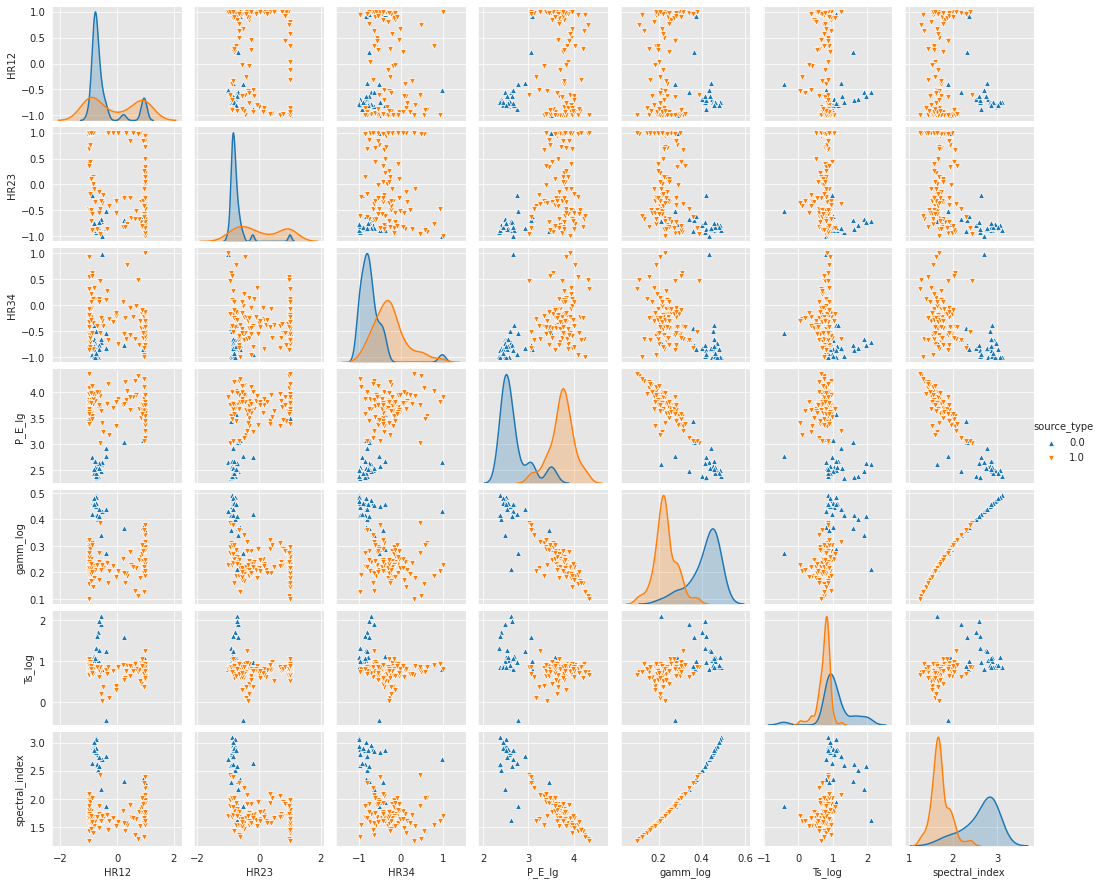

In [0]:
g=sns.pairplot(anomalos, hue='source_type', vars=features_ , markers=["^", "v"])

g.fig.set_size_inches(15,12)

In [0]:
normales.head(5)

,HR12,HR23,HR34,P_E_lg,gamm_log,Ts_log,spectral_index,anomaly,source_type
0,-0.466534,-0.659626,-0.641768,2.719107,0.328037,0.888437,2.12832,1,1.0
1,-0.563112,-0.727332,-0.845465,2.614918,0.369390,1.027710,2.34094,1,0.0
2,-0.610184,-0.716013,-0.753035,2.469248,0.369381,1.470371,2.34089,1,0.0
3,-0.455873,-0.691567,-0.673485,2.699760,0.332907,1.178357,2.15232,1,0.0
4,-0.521313,-0.652628,-0.702739,2.566261,0.326352,1.447286,2.12008,1,0.0


In [0]:
#Curvas ROC con normales
#normales.head(3)
#feat_=['HR12',	'HR23',	'HR34',	'P_E_lg',	'gamm_log',	'Ts_log',	'spectral_index']
#y_=normales['source_type']
#normales=normales[feat_]
#sc = StandardScaler()
#sc.fit(normales)
#sc.fit(y_)
#normales = sc.transform(normales)
#mf.ROC_multiple(clasificadores,normales,y_)


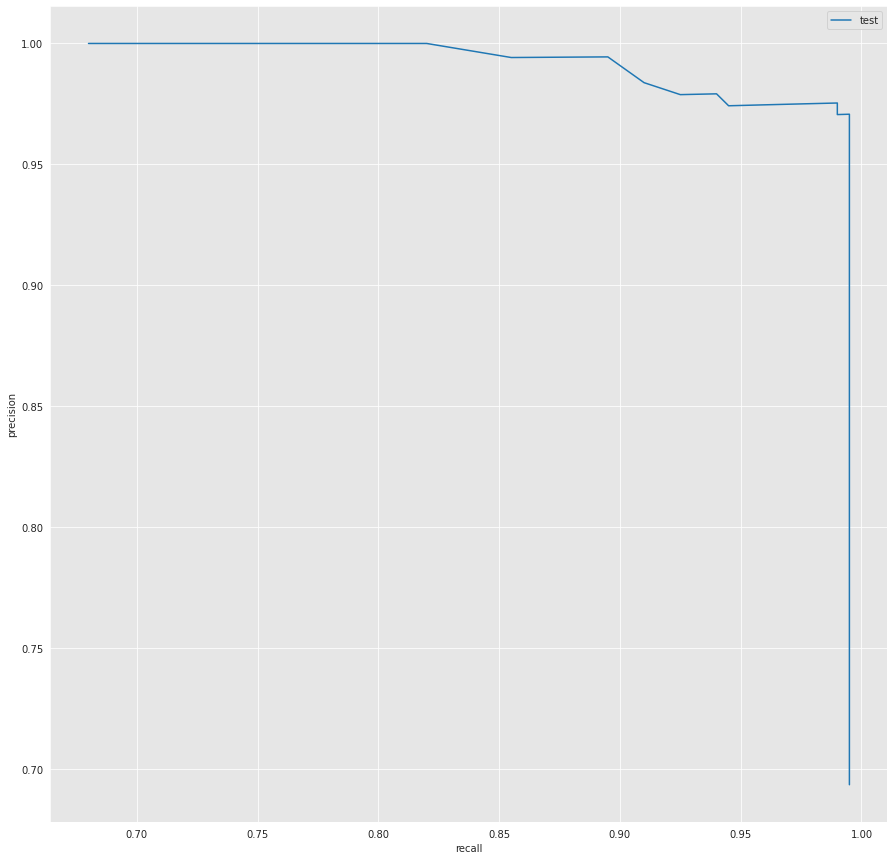

In [0]:
def plot_pre_rec(clf,X_test,y_test,pre_,rec_):
          #for clf in clasificadores:
        # calculate the fpr and tpr for all thresholds of the classification
          
          y_pred=clf.predict_proba(X_test)[:,1]
          #y_pred
          precision , recall,thresholds,f1,mcc=mf.prec_rec(0,1,48,y_test,y_pred)
          plot_df = pd.DataFrame({'recall': recall, 'precision': precision, 'threshold': thresholds})
          tmp_df=mf.rule_tresholds(pre_,rec_,plot_df)
          #print (score_1)
          # method I: plt
    

          
          #plt.legend(loc = 'lower right')

plot_pre_rec(XGB_model,X_test,y_test,0.6,0.4)  

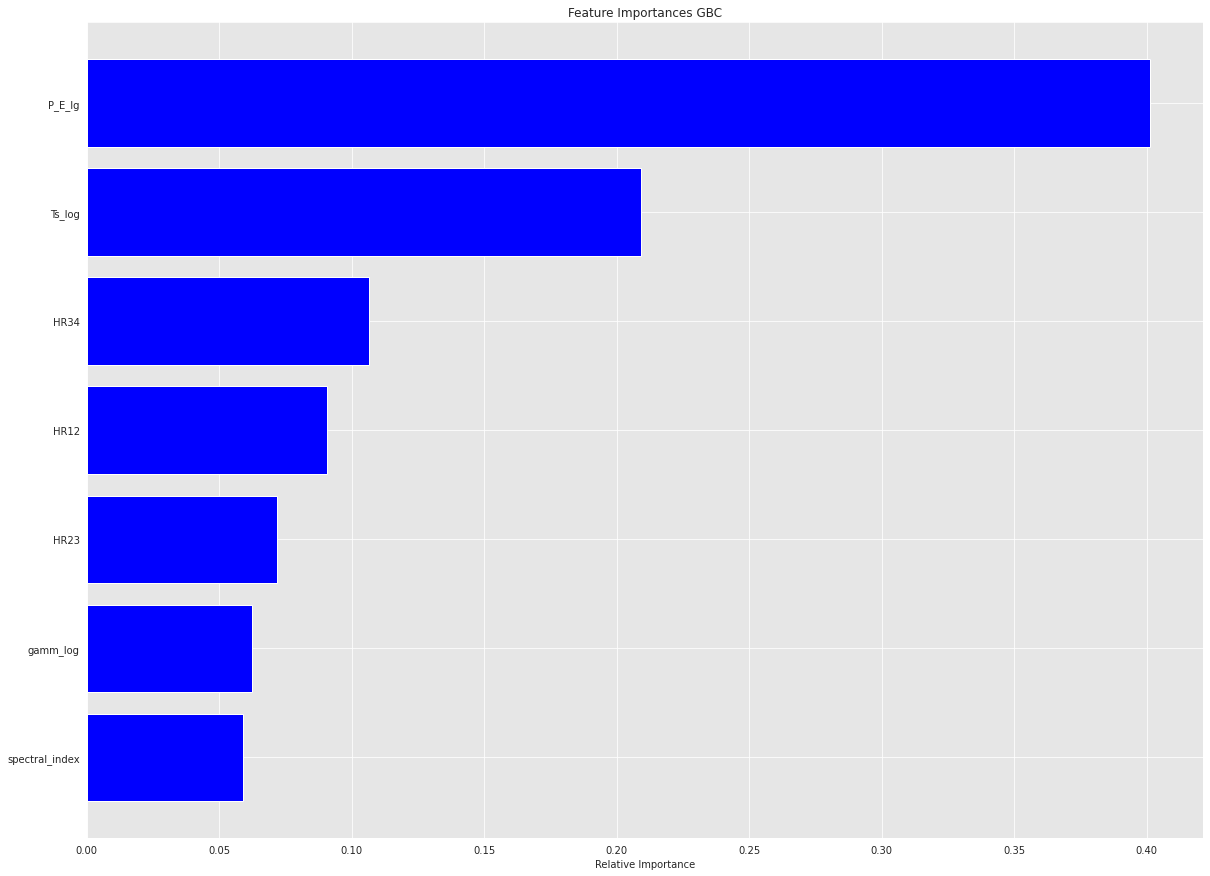

array([0.09055298, 0.07182088, 0.1063679 , 0.40106865, 0.06224284,
       0.20908139, 0.05886535])

In [0]:
importances = GBC_model.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(20,15))
plt.title('Feature Importances GBC')

plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features_[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()
importances

In [0]:

df = pd.DataFrame(columns = features_)
df.loc[-1] =importances  # adding a row
df.index = df.index + 1  # shifting index
df = df.sort_index()
df

,HR12,HR23,HR34,P_E_lg,gamm_log,Ts_log,spectral_index
0,0.090553,0.071821,0.106368,0.401069,0.062243,0.209081,0.058865


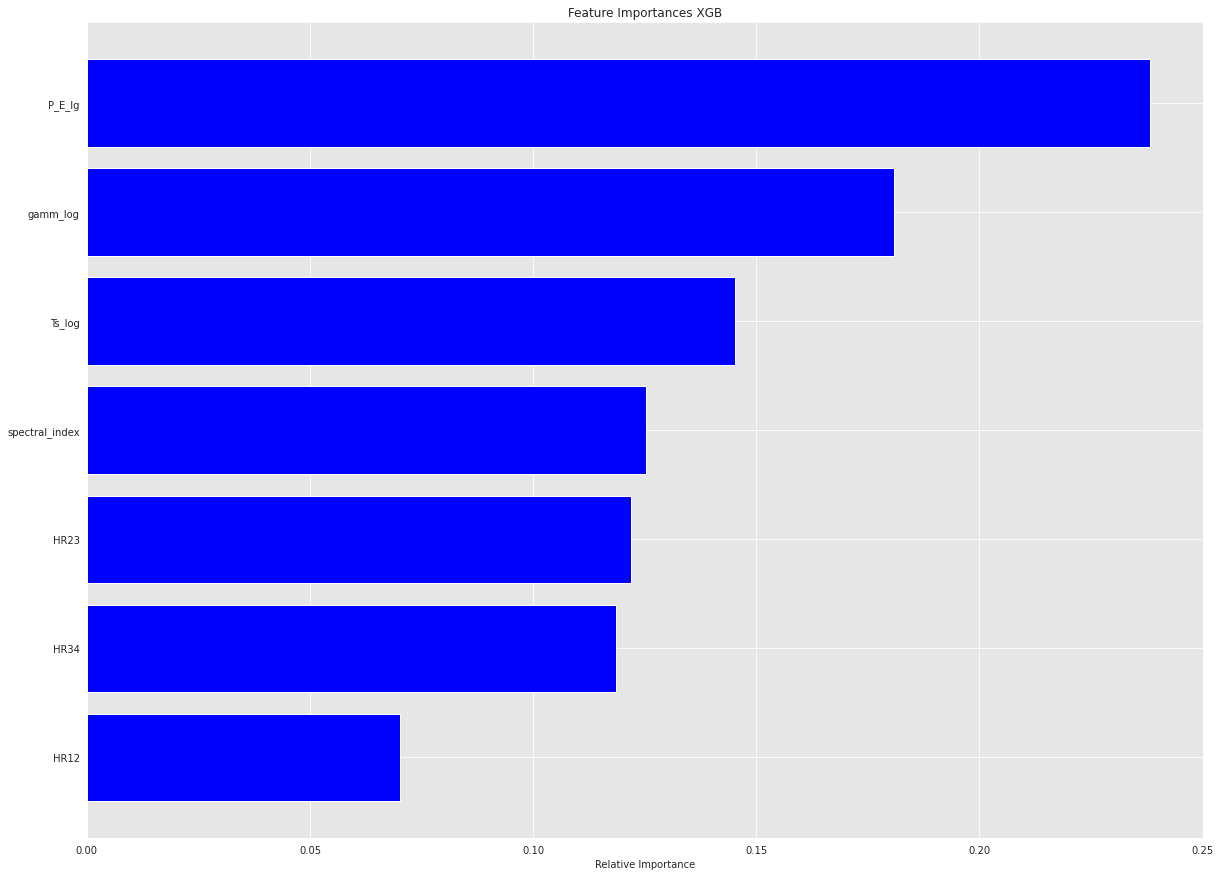

array([0.07016521, 0.12182608, 0.1186558 , 0.23815566, 0.1807898 ,
       0.14521143, 0.12519601], dtype=float32)

In [0]:
importances_XGB = XGB_model.feature_importances_
indices = np.argsort(importances_XGB)
plt.figure(figsize=(20,15))
plt.title('Feature Importances XGB')

plt.barh(range(len(indices)), importances_XGB[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features_[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()
importances_XGB

In [0]:

df.loc[-1] =importances_XGB  # adding a row
df.index = df.index + 1  # shifting index
df = df.sort_index()
df

,HR12,HR23,HR34,P_E_lg,gamm_log,Ts_log,spectral_index
0,0.070165,0.121826,0.118656,0.238156,0.180790,0.145211,0.125196
1,0.090553,0.071821,0.106368,0.401069,0.062243,0.209081,0.058865


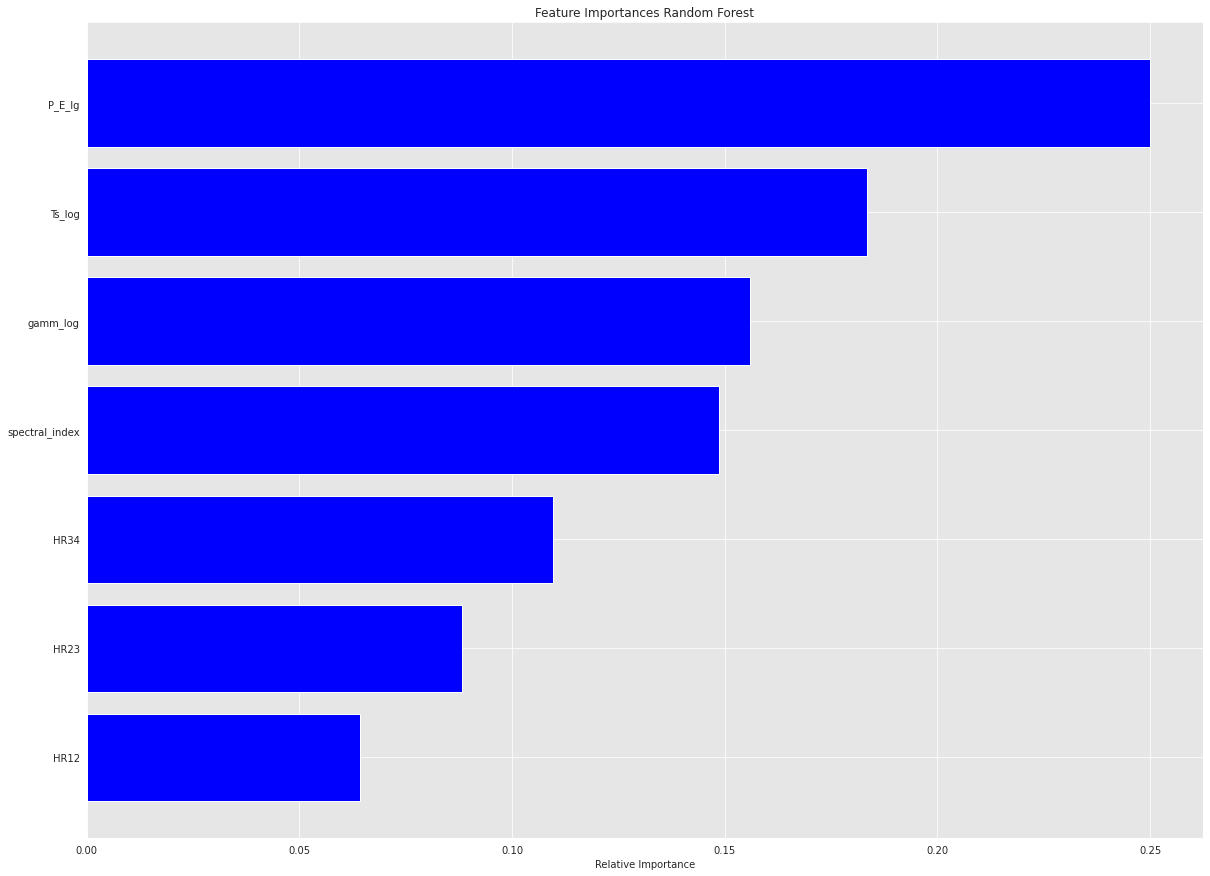

array([0.06429671, 0.08813098, 0.10959404, 0.24991361, 0.15585372,
       0.18347427, 0.14873666])

In [0]:
importances_FOREST = Forest_model.feature_importances_
indices = np.argsort(importances_FOREST)
plt.figure(figsize=(20,15))
plt.title('Feature Importances Random Forest')

plt.barh(range(len(indices)), importances_FOREST[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features_[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()
importances_FOREST

In [0]:

df.loc[-1] =importances_FOREST  # adding a row
df.index = df.index + 1  # shifting index
df = df.sort_index()
df

In [0]:
importances_TREE = tree_model.feature_importances_
indices = np.argsort(importances_TREE)
plt.figure(figsize=(20,15))
plt.title('Feature Importances Decission Tree')

plt.barh(range(len(indices)), importances_TREE[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features_[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()
importances_FOREST

In [0]:

df.loc[-1] =importances_TREE  # adding a row
df.index = df.index + 1  # shifting index
df = df.sort_index()
df

In [0]:


def f_importances(coef, names,clf):
    imp = coef
    imp,names = zip(*sorted(zip(imp,names)))
    plt.barh(range(len(names)), imp, align='center')
    nombre=clf.__class__.__name__
    titulo='Feature Importances  ' + nombre 
    plt.title(titulo)
    plt.yticks(range(len(names)), names)
    plt.show()





print(np.asarray(features_))
#print(SVM_model.coef_[0])
tot=sum(np.abs(SVM_model.coef_[0]))
coef_abs=np.abs(SVM_model.coef_[0]/tot)
f_importances(coef_abs, np.asarray(features_),SVM_model)
print(coef_abs)

In [0]:
df.loc[-1] =coef_abs  # adding a row
df.index = df.index + 1  # shifting index
df = df.sort_index()
df

In [0]:
print(np.asarray(features_))

tot=sum(np.abs(LR_model.coef_[0]))
coef_abs_2=np.abs(LR_model.coef_[0]/tot)
print(coef_abs)
f_importances(coef_abs_2, np.asarray(features_),LR_model)

In [0]:
df.loc[-1] =coef_abs_2  # adding a row
df.index = df.index + 1  # shifting index
df = df.sort_index()
df

In [0]:
df.to_excel('/content/drive/My Drive/feature_importances.xlsx')

In [0]:
anomalos,normales=mf.iso_tree(X,y_)
normales.head(5)

<class 'numpy.ndarray'>
 1    1006
-1     138
Name: anomaly, dtype: int64


,HR12,HR23,HR34,P_E_lg,gamm_log,Ts_log,spectral_index,anomaly,source_type
0,-0.466534,-0.659626,-0.641768,2.719107,0.328037,0.888437,2.12832,1,1.0
1,-0.563112,-0.727332,-0.845465,2.614918,0.369390,1.027710,2.34094,1,0.0
2,-0.610184,-0.716013,-0.753035,2.469248,0.369381,1.470371,2.34089,1,0.0
3,-0.455873,-0.691567,-0.673485,2.699760,0.332907,1.178357,2.15232,1,0.0
4,-0.521313,-0.652628,-0.702739,2.566261,0.326352,1.447286,2.12008,1,0.0


<class 'numpy.ndarray'>
 1    1006
-1     138
Name: anomaly, dtype: int64


TypeError: ignored

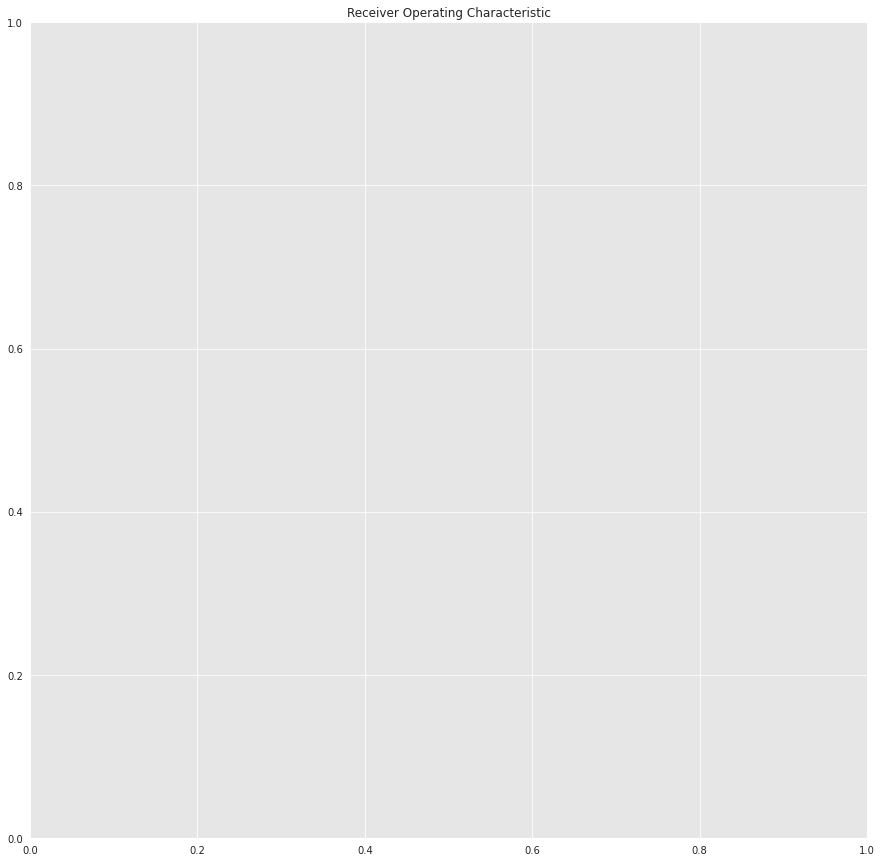

<class 'numpy.ndarray'>
 1    1006
-1     138
Name: anomaly, dtype: int64


TypeError: ignored

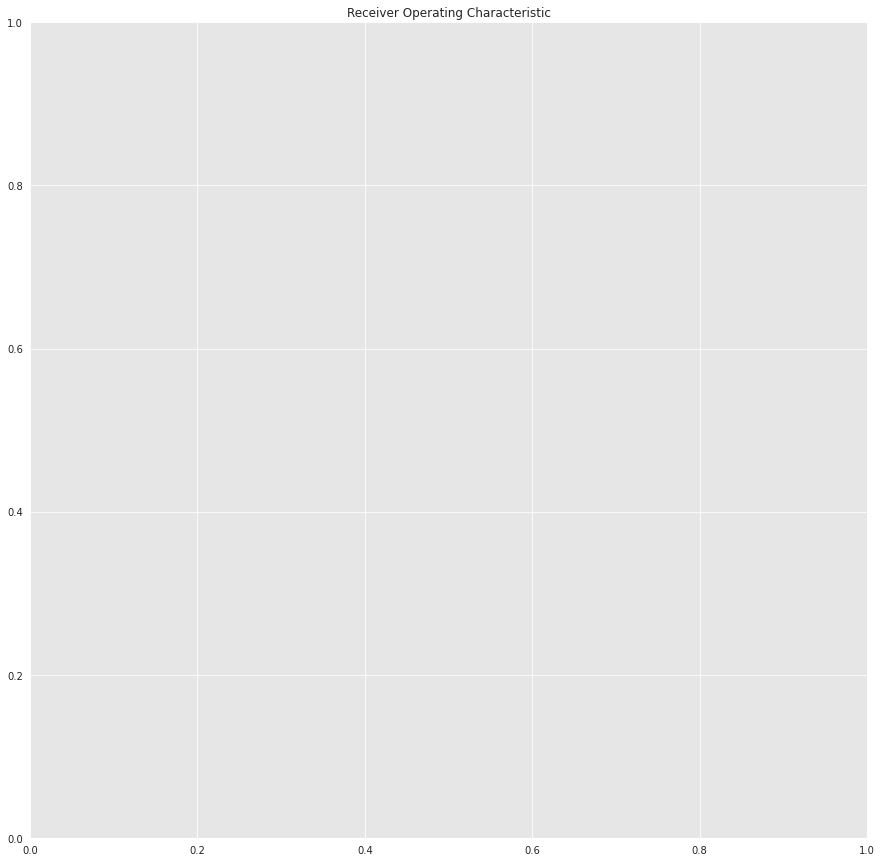

<class 'numpy.ndarray'>
 1    1006
-1     138
Name: anomaly, dtype: int64


TypeError: ignored

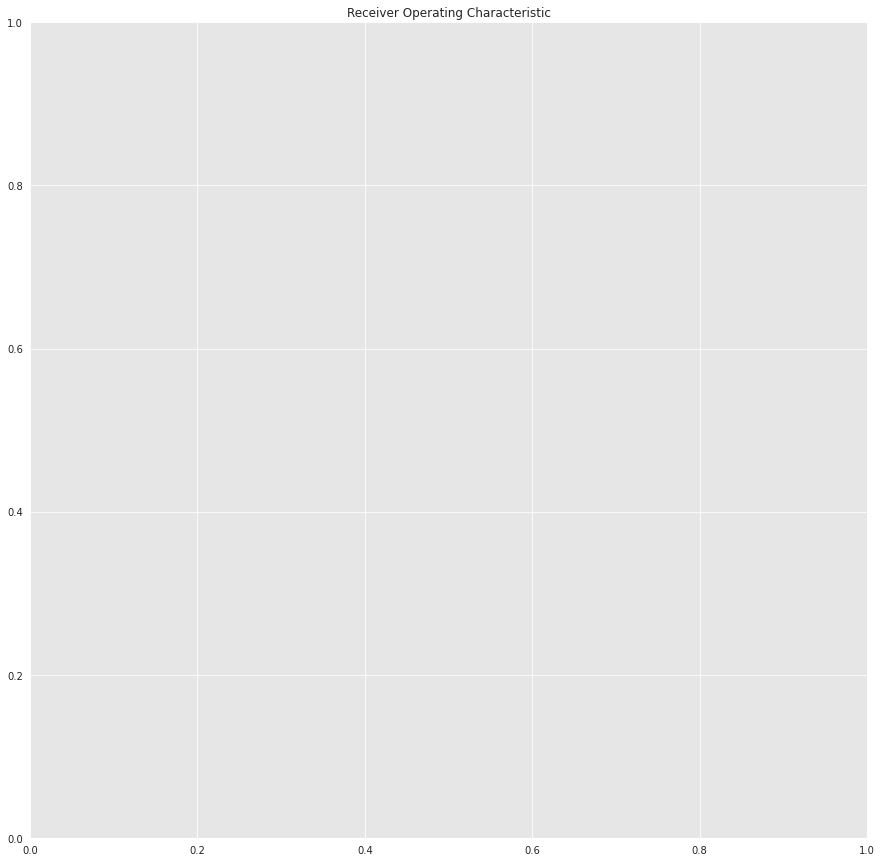

<class 'numpy.ndarray'>
 1    1006
-1     138
Name: anomaly, dtype: int64


TypeError: ignored

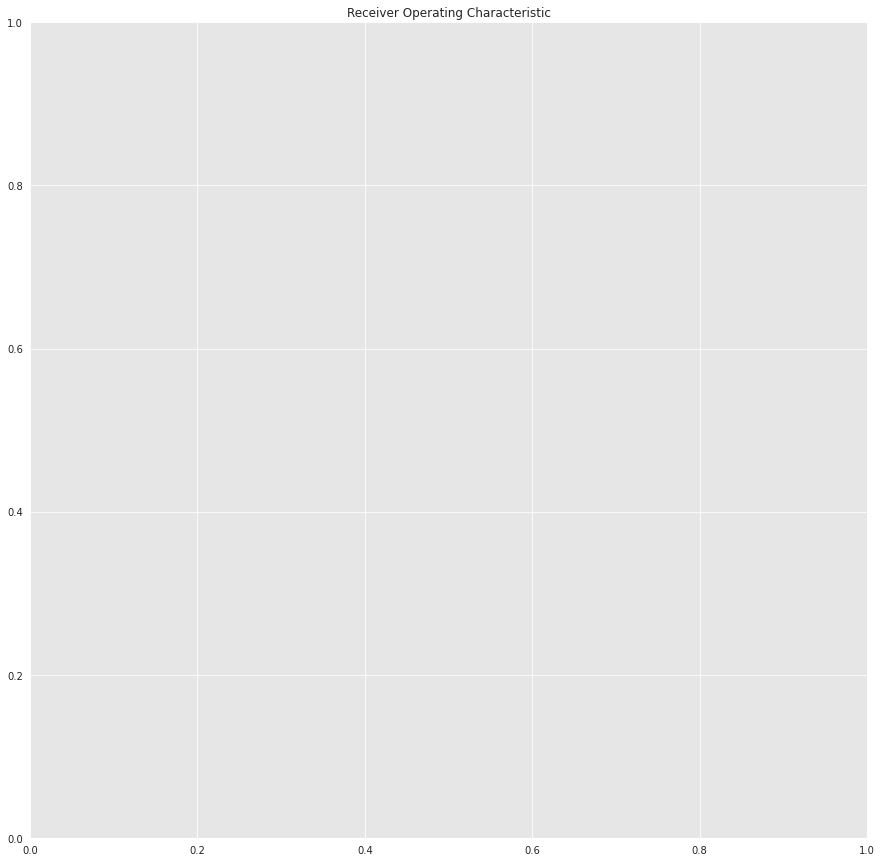

<class 'numpy.ndarray'>
 1    1006
-1     138
Name: anomaly, dtype: int64


TypeError: ignored

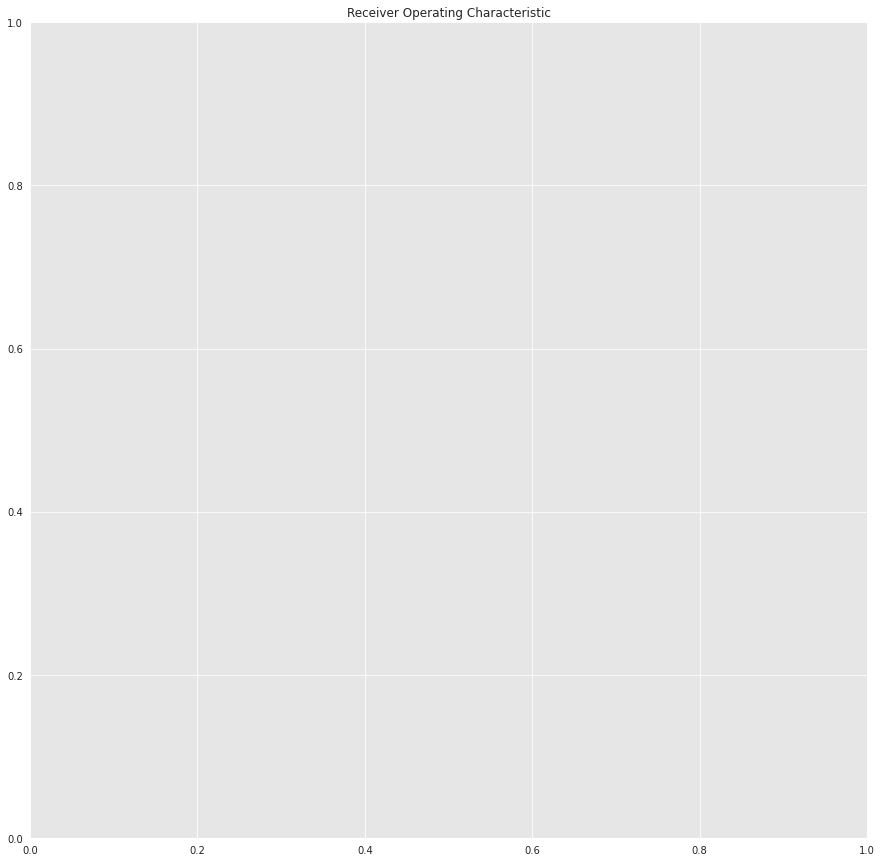

<class 'numpy.ndarray'>
 1    1006
-1     138
Name: anomaly, dtype: int64


TypeError: ignored

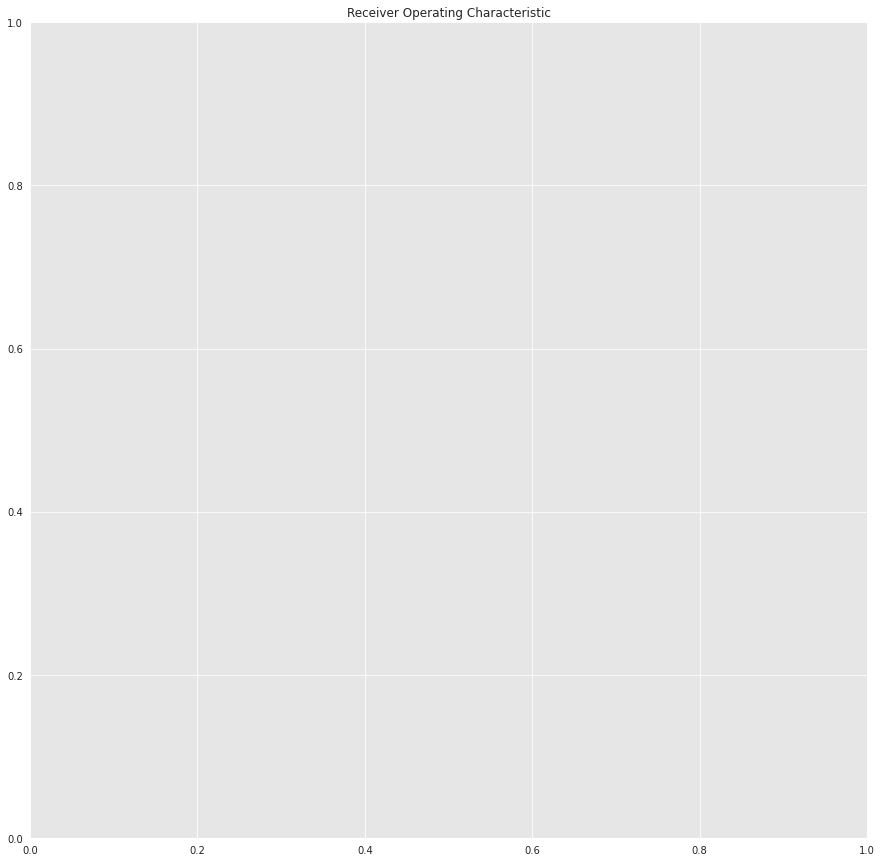

<class 'numpy.ndarray'>
 1    1006
-1     138
Name: anomaly, dtype: int64


TypeError: ignored

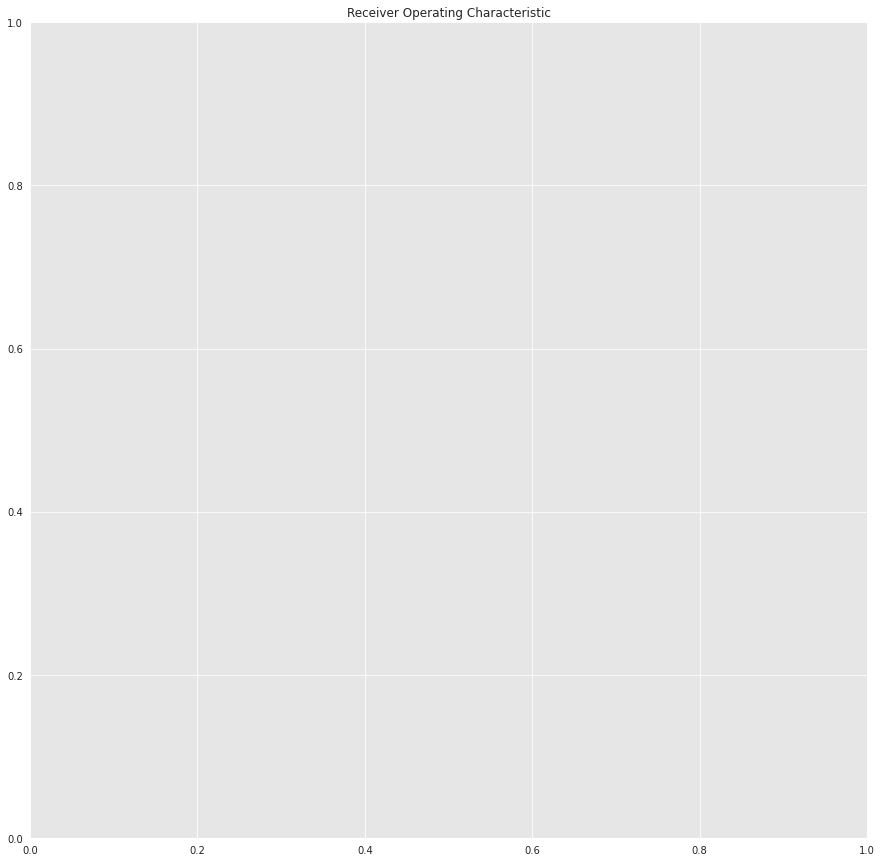

<class 'numpy.ndarray'>
 1    1006
-1     138
Name: anomaly, dtype: int64


TypeError: ignored

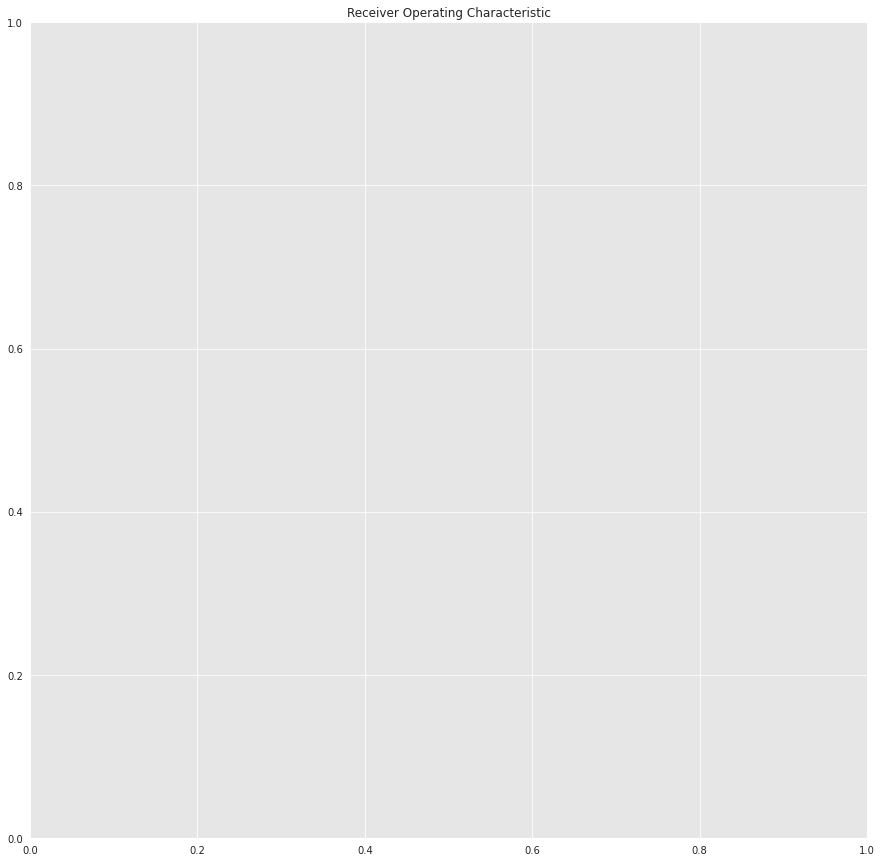

<class 'numpy.ndarray'>
 1    1006
-1     138
Name: anomaly, dtype: int64


TypeError: ignored

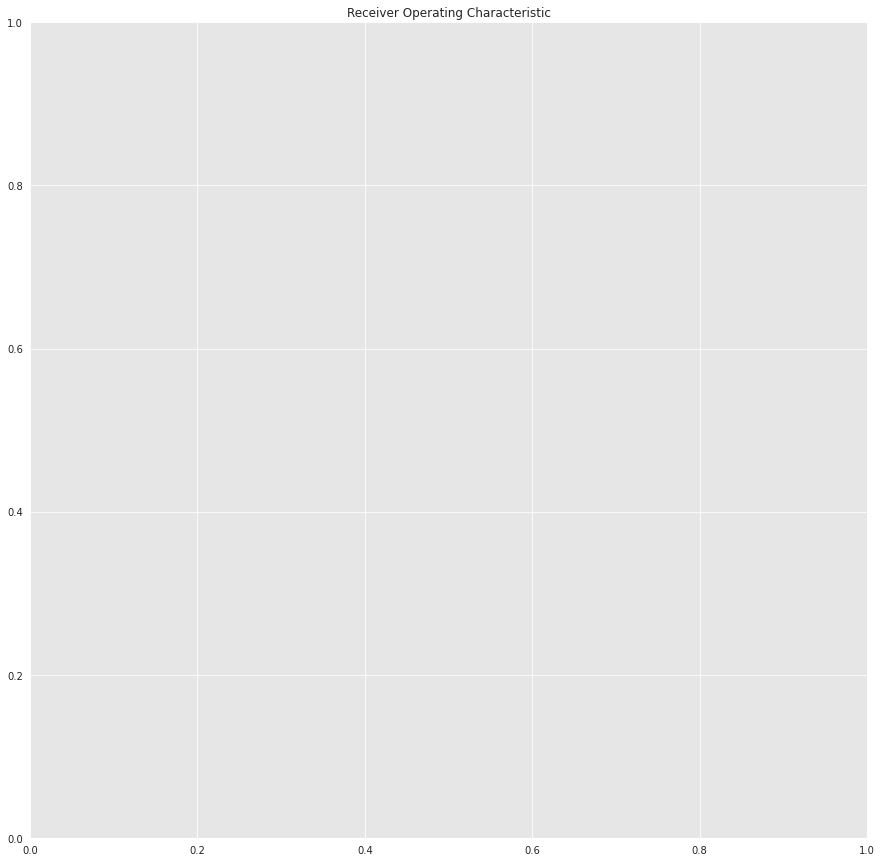

<class 'numpy.ndarray'>
 1    1006
-1     138
Name: anomaly, dtype: int64


TypeError: ignored

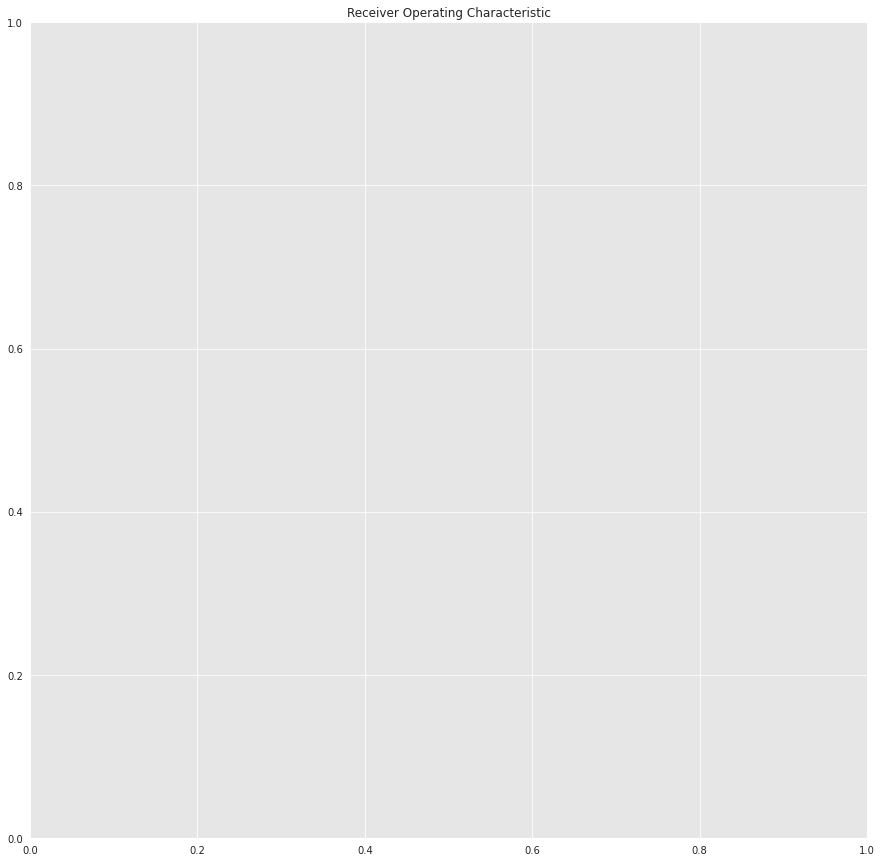

<class 'numpy.ndarray'>
 1    1006
-1     138
Name: anomaly, dtype: int64


TypeError: ignored

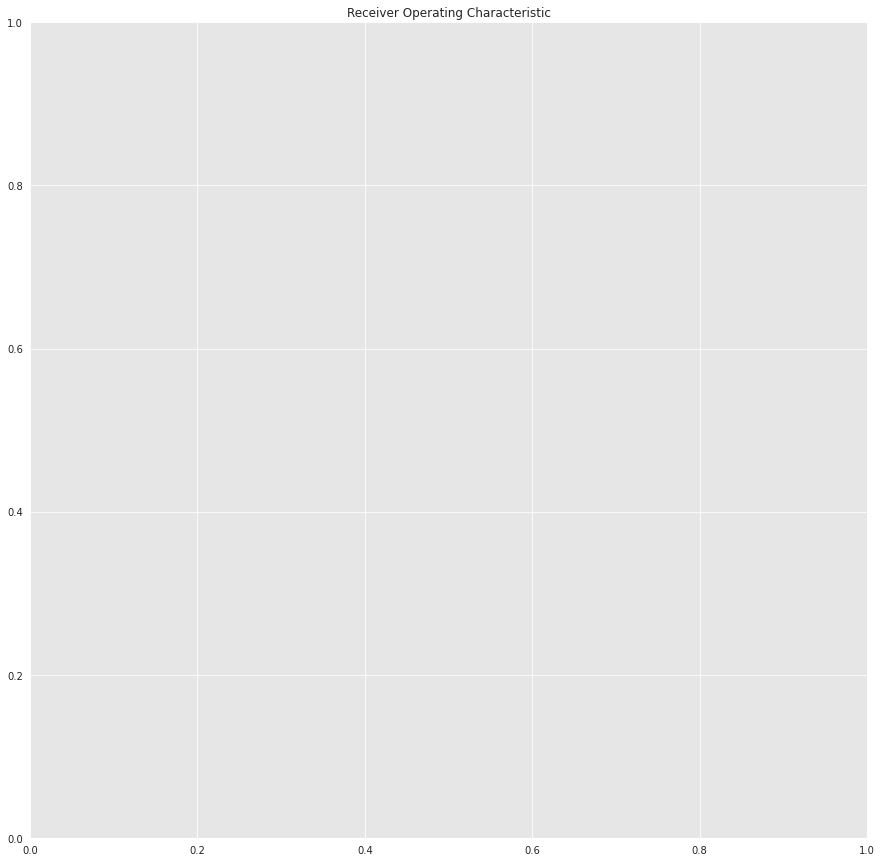

<class 'numpy.ndarray'>
 1    1006
-1     138
Name: anomaly, dtype: int64


TypeError: ignored

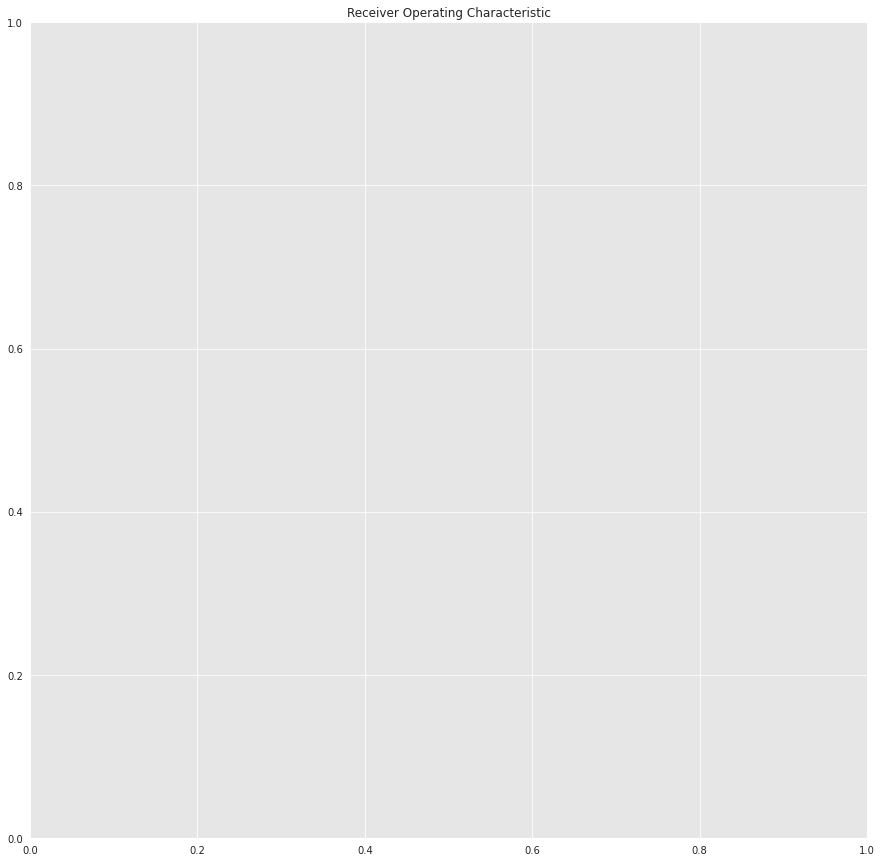

<class 'numpy.ndarray'>
 1    1006
-1     138
Name: anomaly, dtype: int64


TypeError: ignored

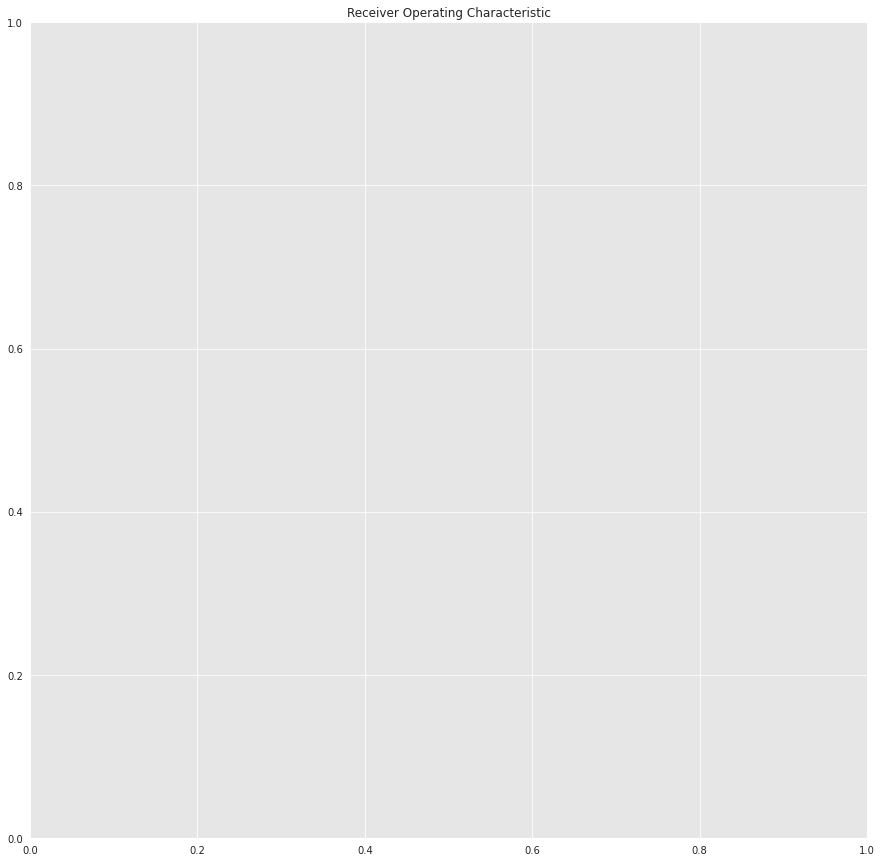

<class 'numpy.ndarray'>
 1    1006
-1     138
Name: anomaly, dtype: int64


TypeError: ignored

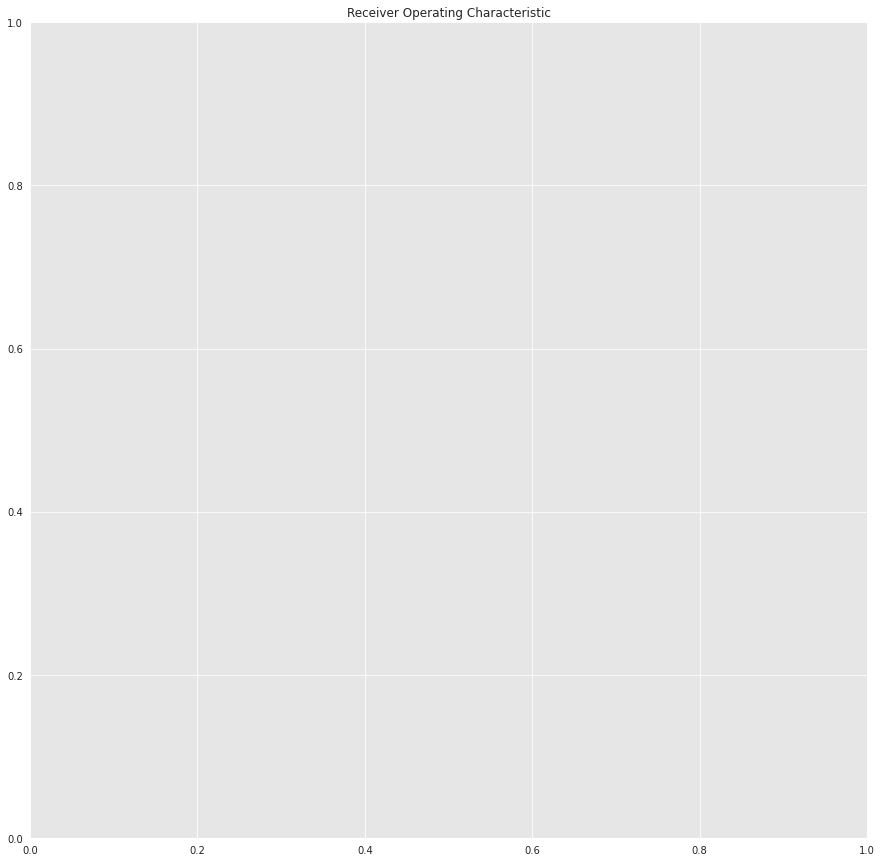

<class 'numpy.ndarray'>
 1    1006
-1     138
Name: anomaly, dtype: int64


TypeError: ignored

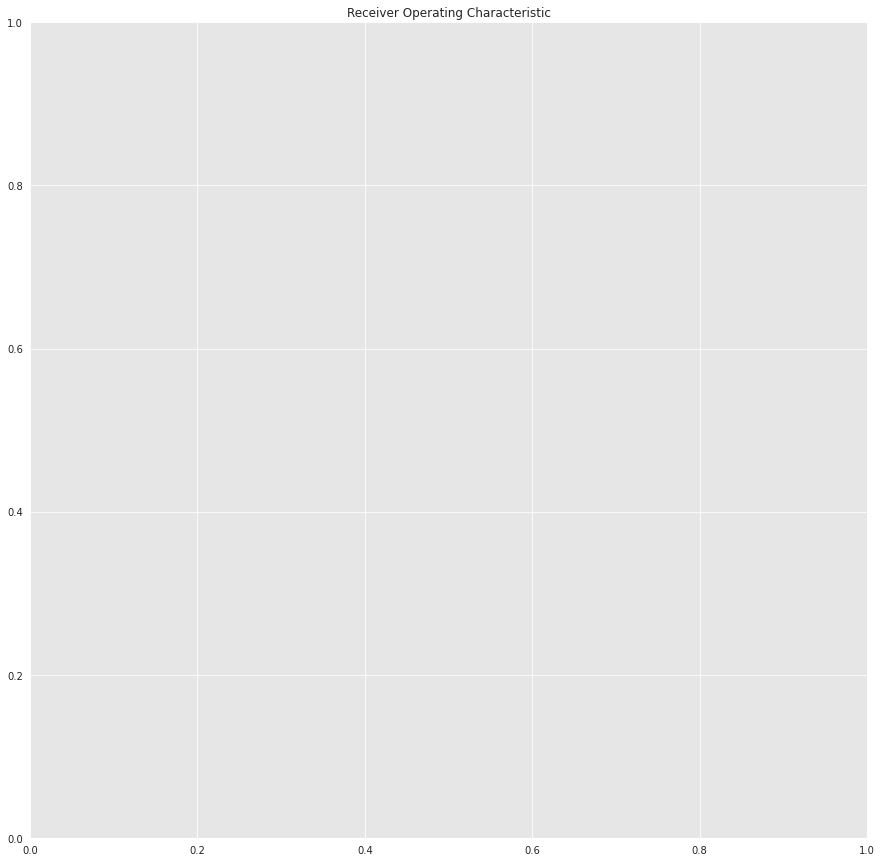

<class 'numpy.ndarray'>
 1    1006
-1     138
Name: anomaly, dtype: int64


TypeError: ignored

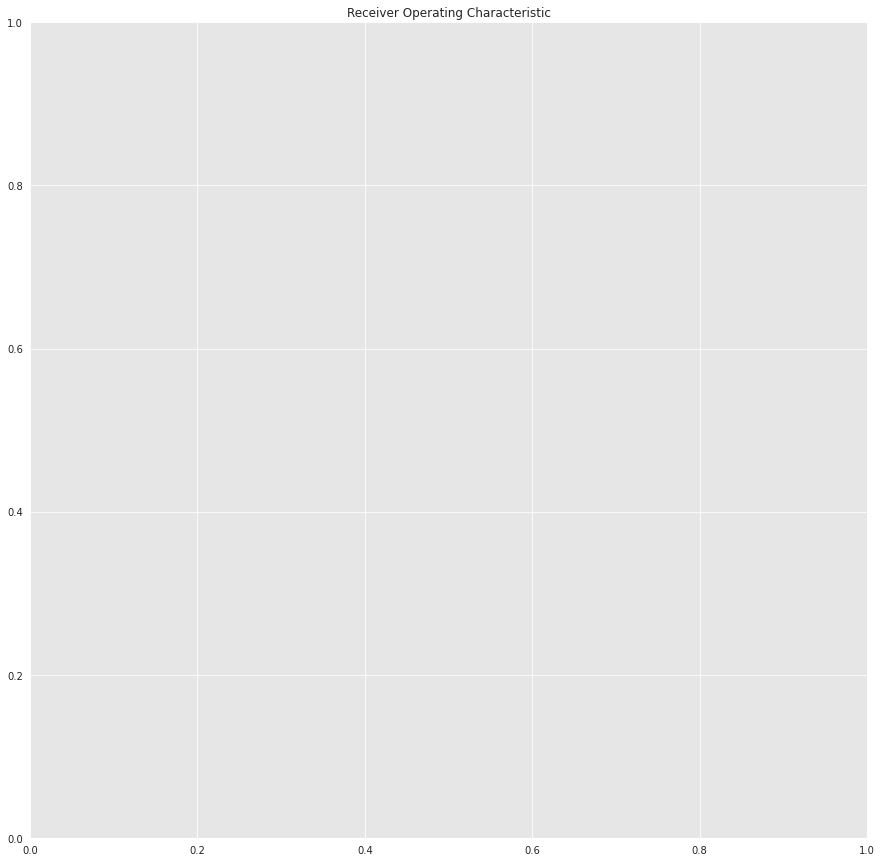

<class 'numpy.ndarray'>
 1    1006
-1     138
Name: anomaly, dtype: int64


TypeError: ignored

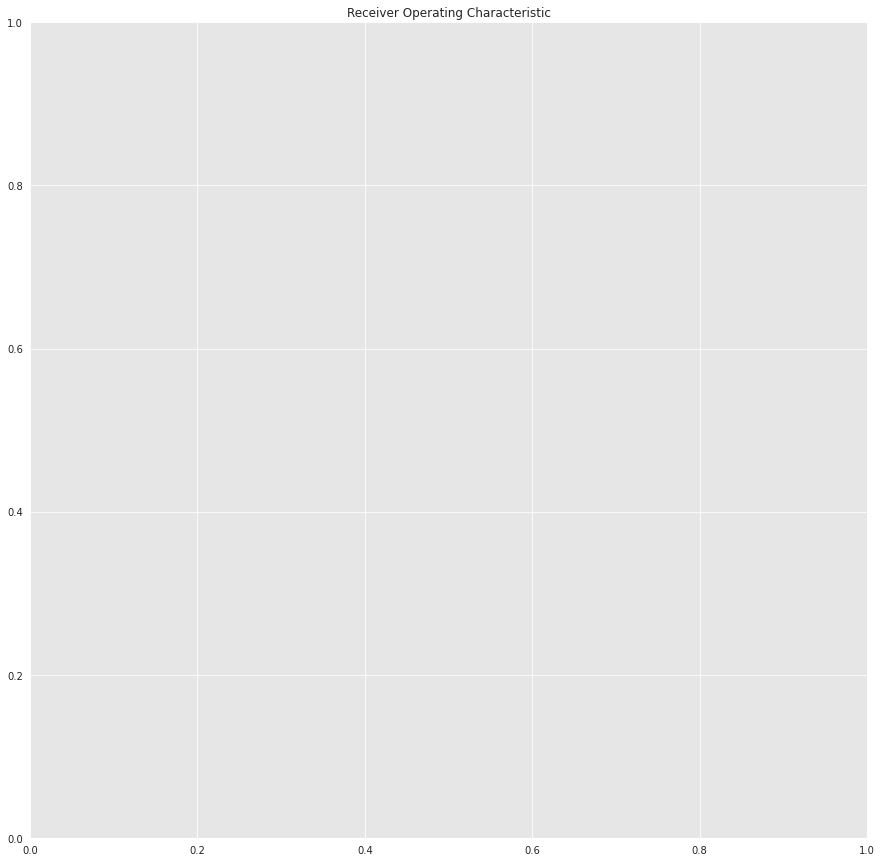

<class 'numpy.ndarray'>
 1    1006
-1     138
Name: anomaly, dtype: int64


TypeError: ignored

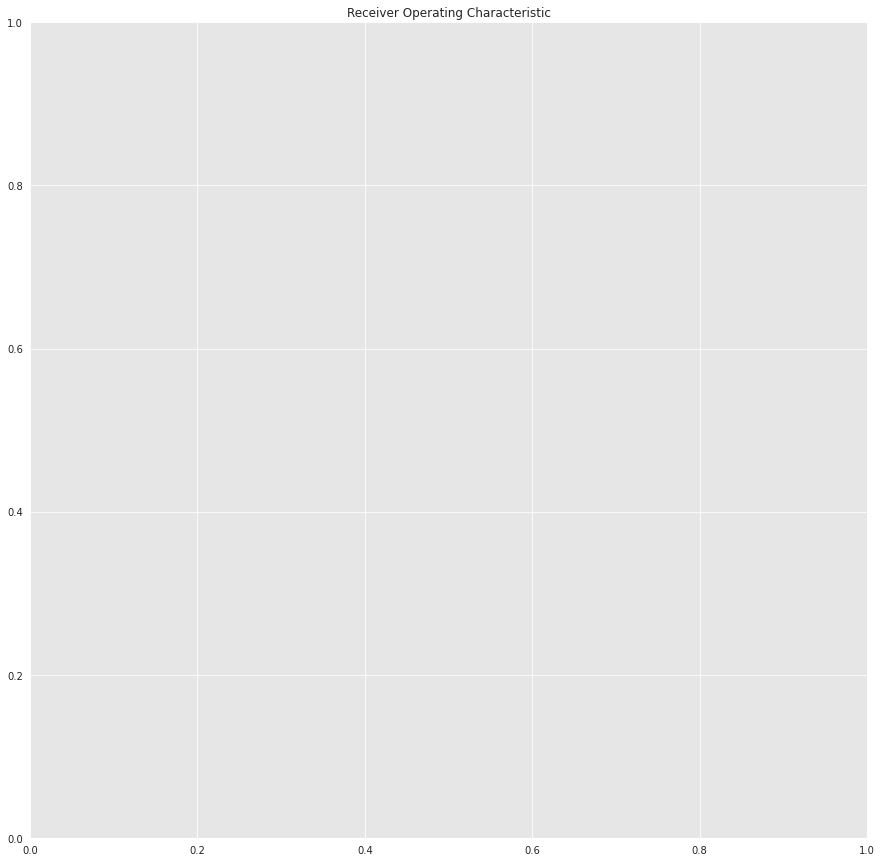

<class 'numpy.ndarray'>
 1    1006
-1     138
Name: anomaly, dtype: int64


TypeError: ignored

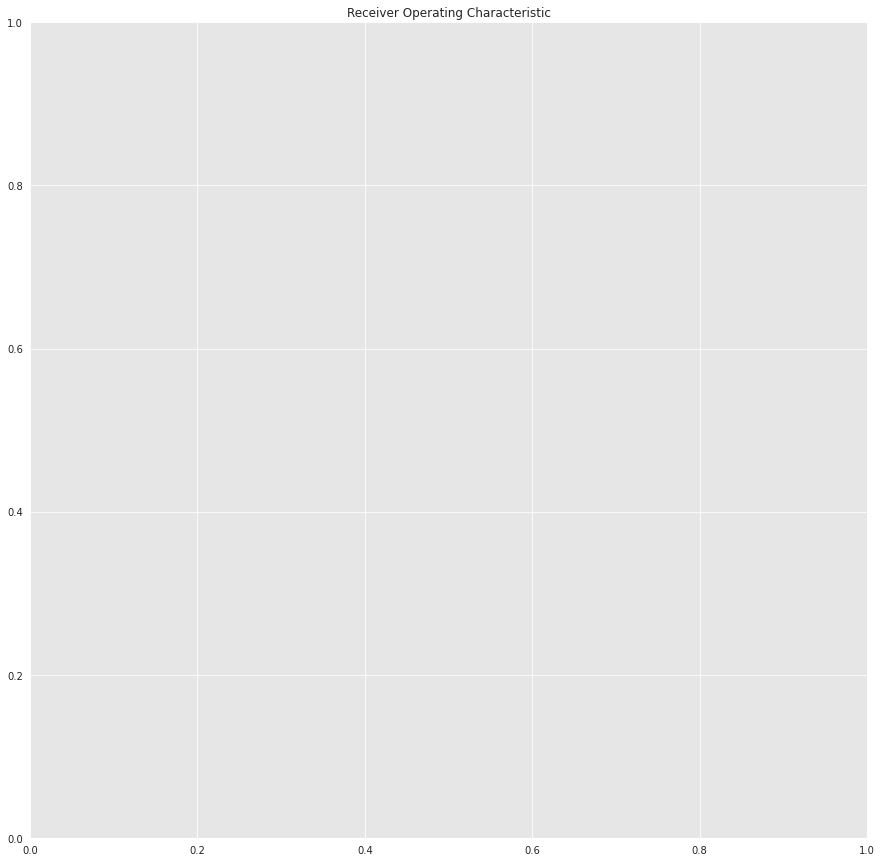

<class 'numpy.ndarray'>
 1    1006
-1     138
Name: anomaly, dtype: int64


TypeError: ignored

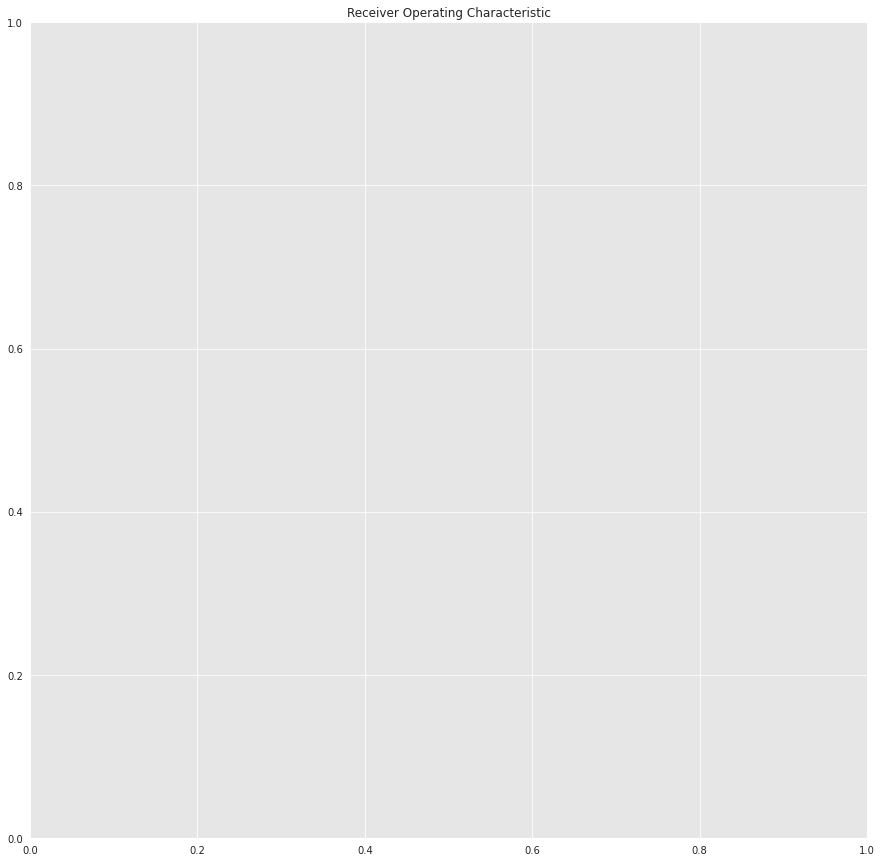

<class 'numpy.ndarray'>
 1    1006
-1     138
Name: anomaly, dtype: int64


TypeError: ignored

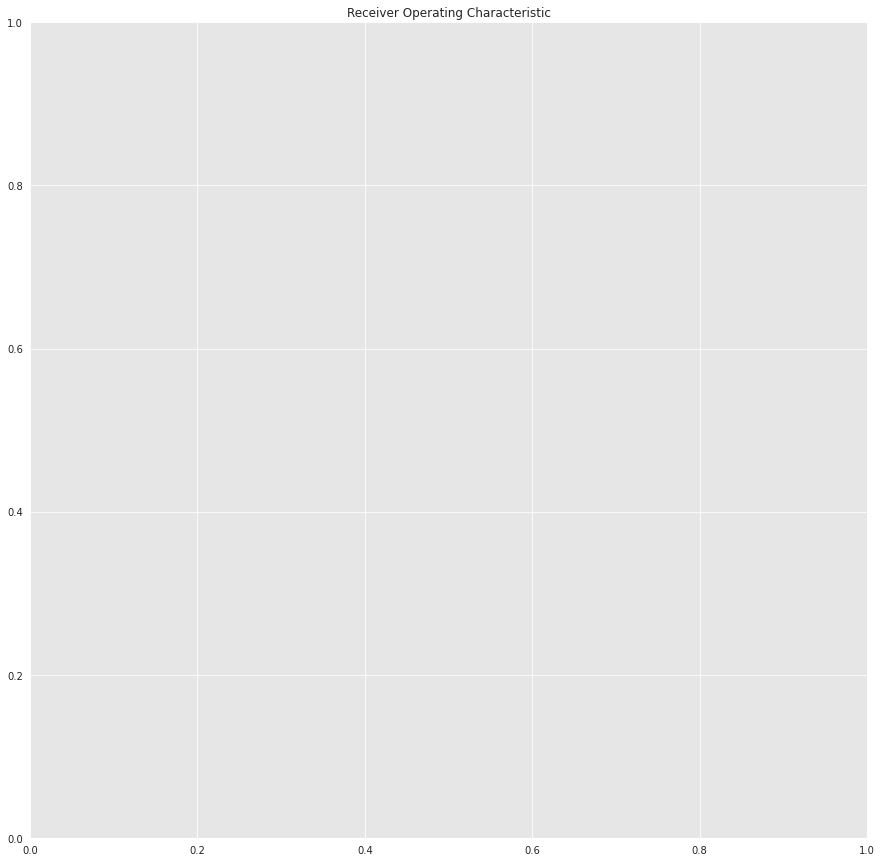

<class 'numpy.ndarray'>
 1    1006
-1     138
Name: anomaly, dtype: int64


TypeError: ignored

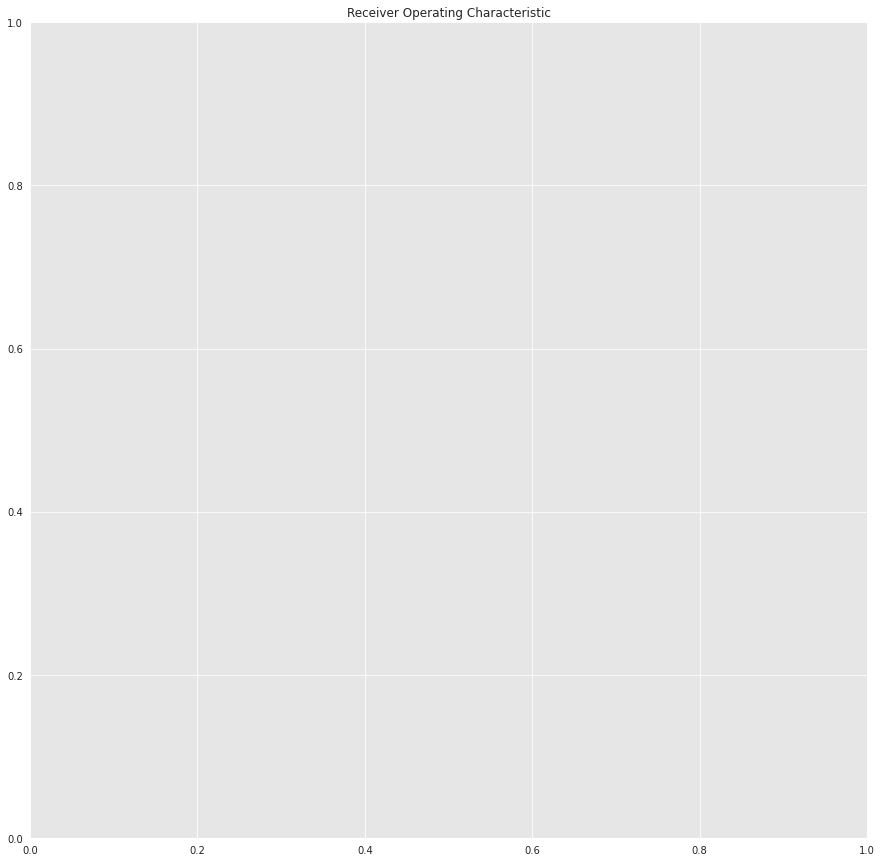

<class 'numpy.ndarray'>
 1    1006
-1     138
Name: anomaly, dtype: int64


TypeError: ignored

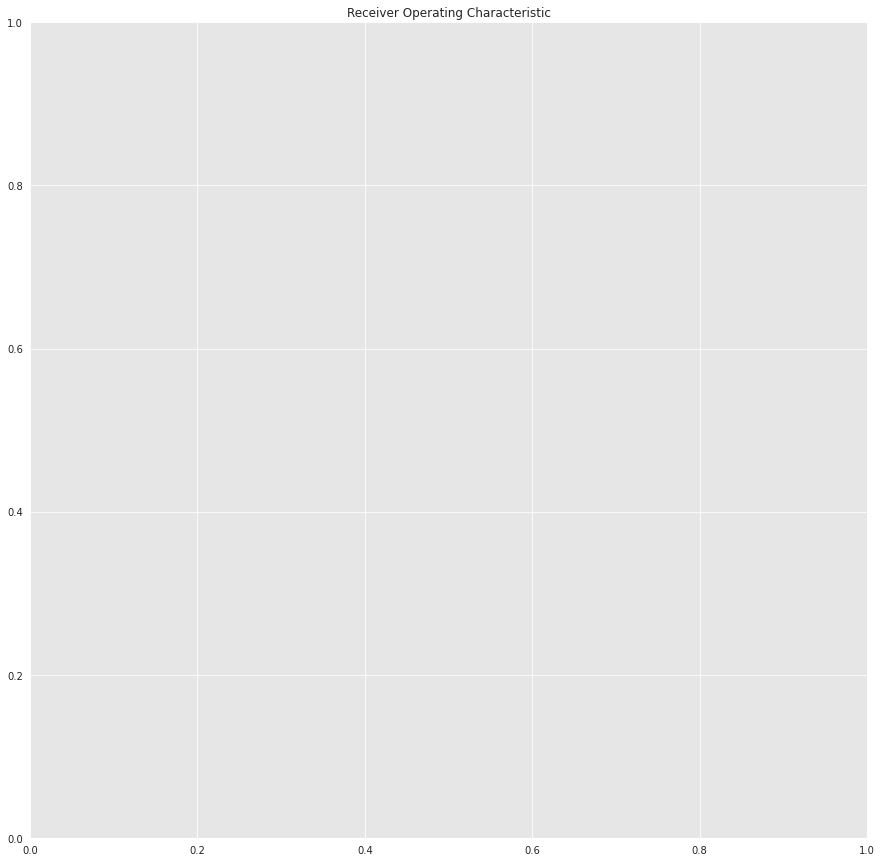

<class 'numpy.ndarray'>
 1    1006
-1     138
Name: anomaly, dtype: int64


TypeError: ignored

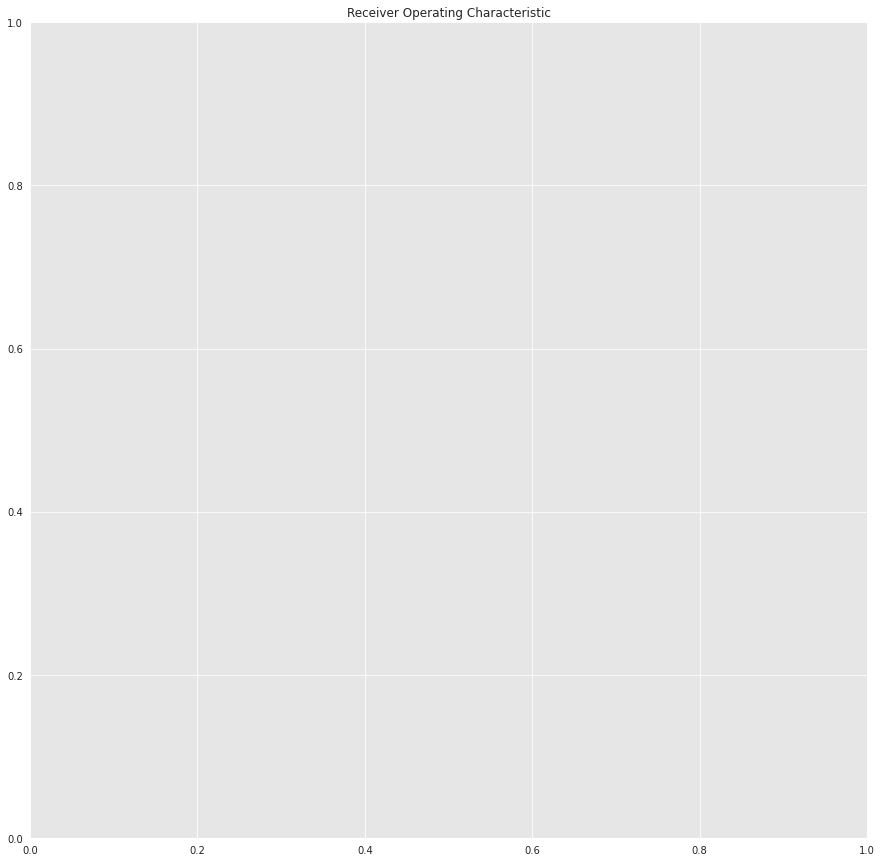

<class 'numpy.ndarray'>
 1    1006
-1     138
Name: anomaly, dtype: int64


TypeError: ignored

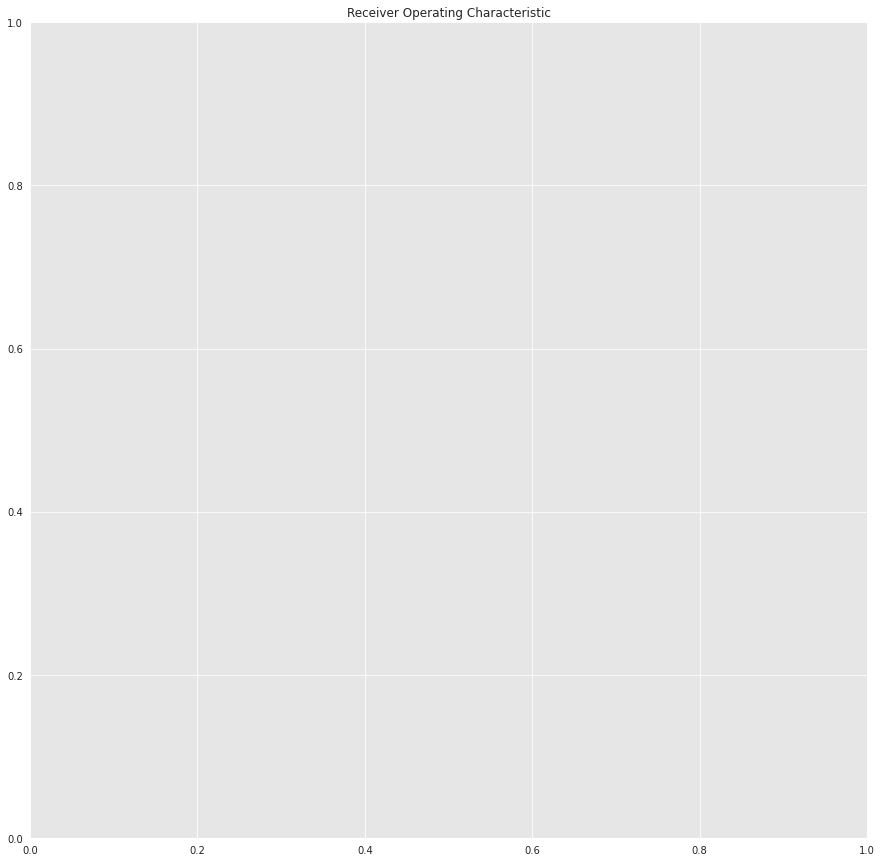

<class 'numpy.ndarray'>
 1    1006
-1     138
Name: anomaly, dtype: int64


TypeError: ignored

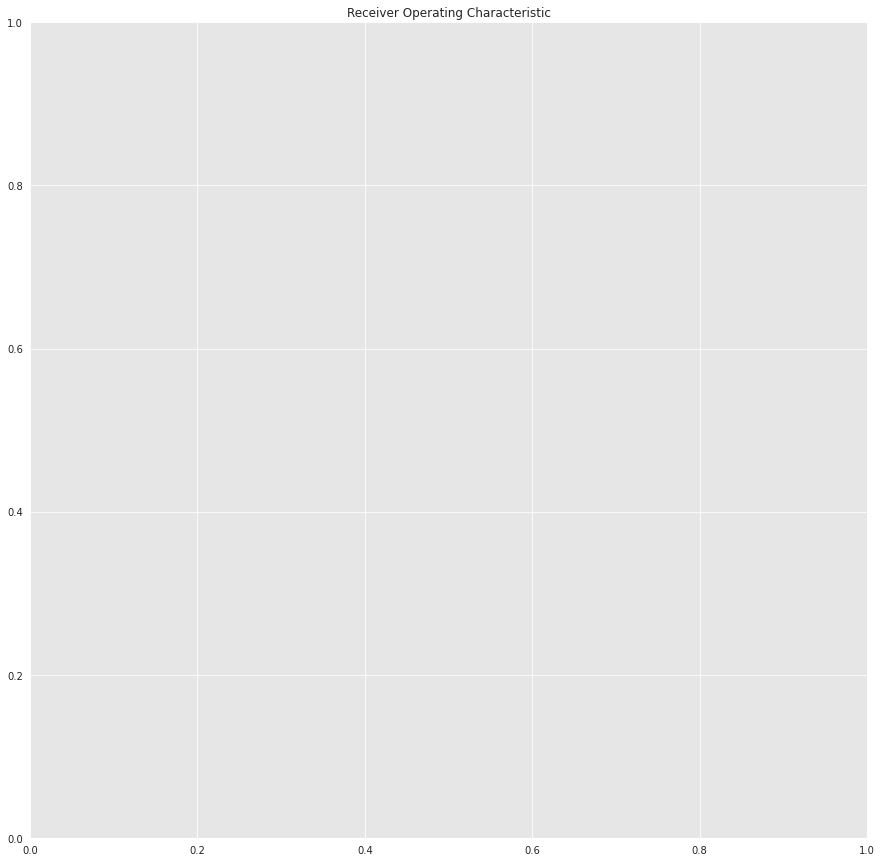

<class 'numpy.ndarray'>
 1    1006
-1     138
Name: anomaly, dtype: int64


TypeError: ignored

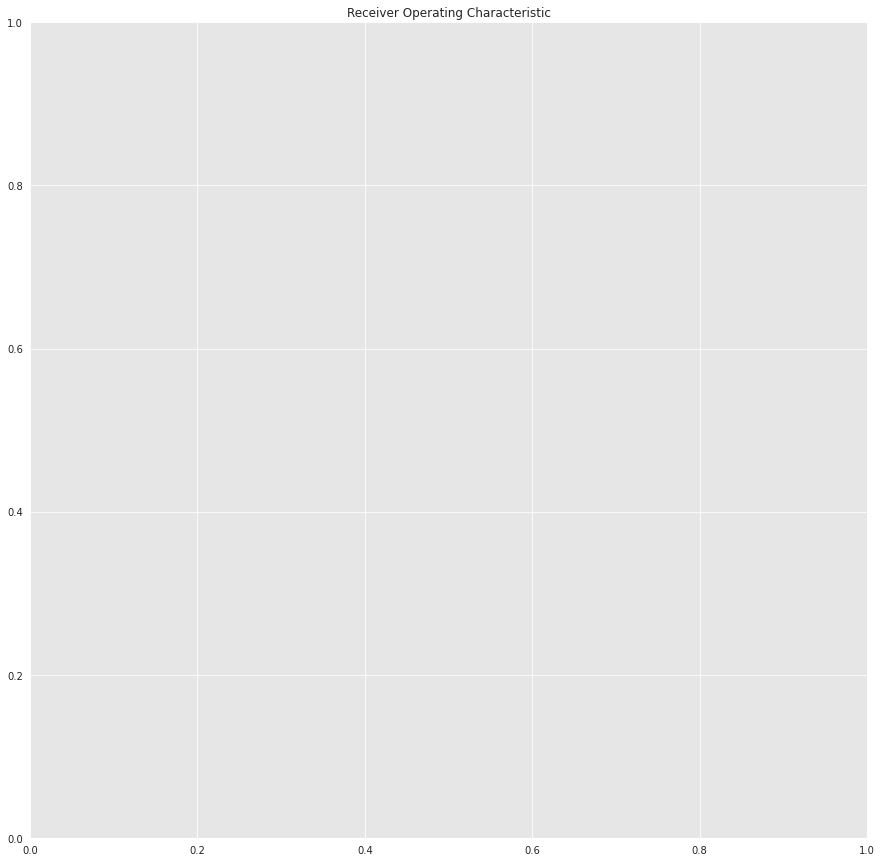

<class 'numpy.ndarray'>
 1    1006
-1     138
Name: anomaly, dtype: int64


TypeError: ignored

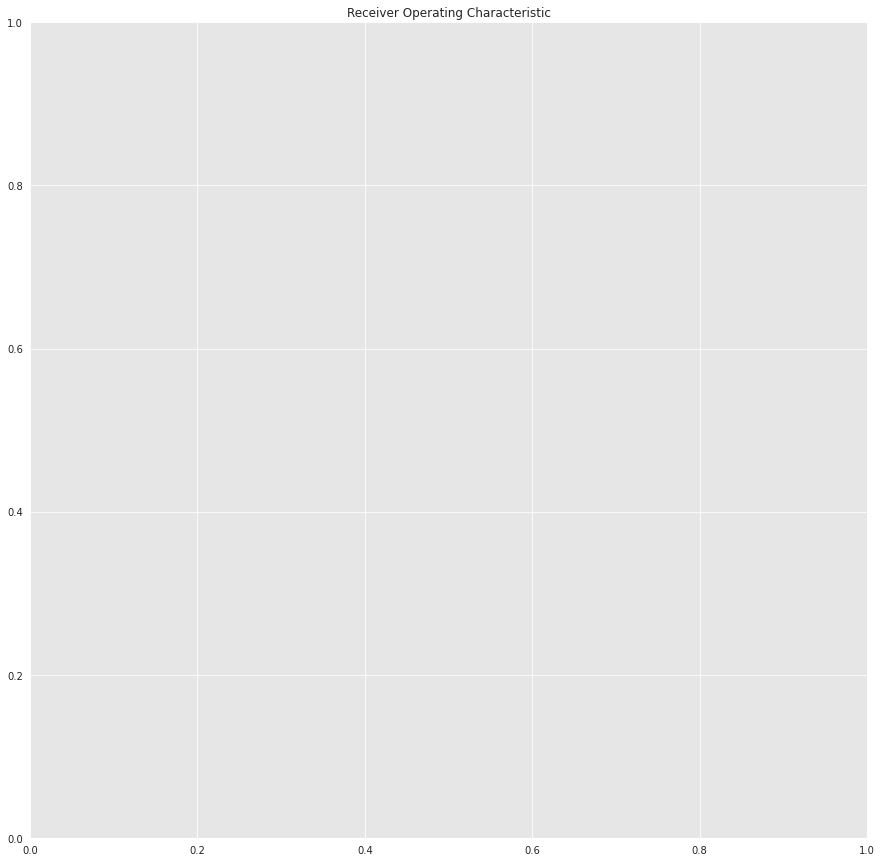

<class 'numpy.ndarray'>
 1    1006
-1     138
Name: anomaly, dtype: int64


TypeError: ignored

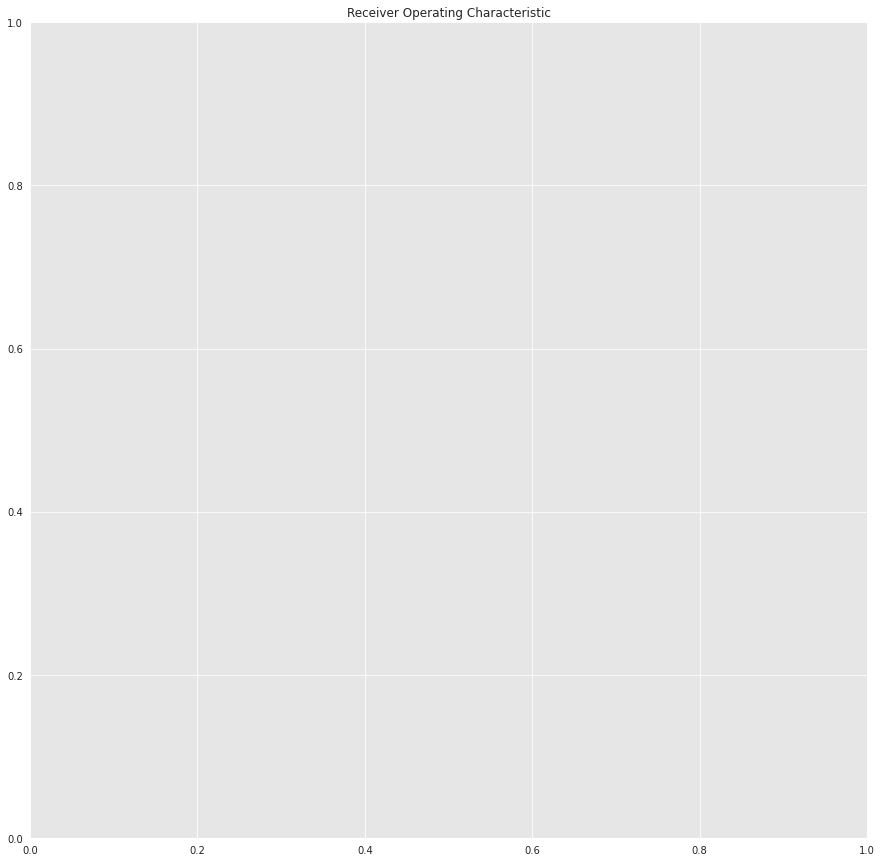

<class 'numpy.ndarray'>
 1    1006
-1     138
Name: anomaly, dtype: int64


TypeError: ignored

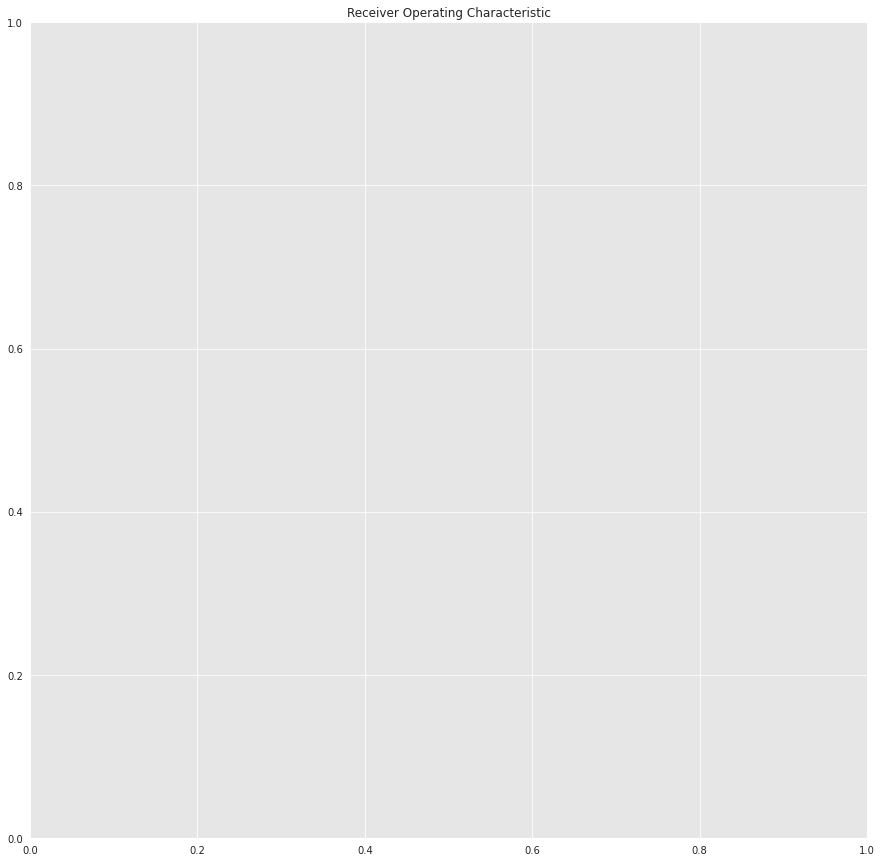

<class 'numpy.ndarray'>
 1    1006
-1     138
Name: anomaly, dtype: int64


TypeError: ignored

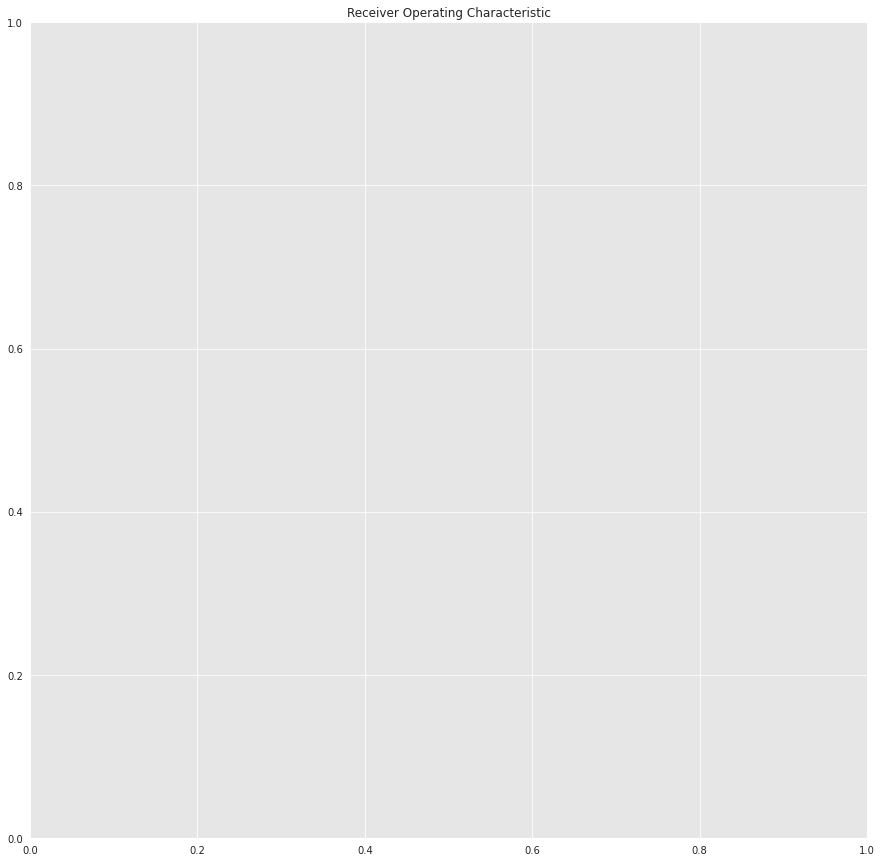

<class 'numpy.ndarray'>
 1    1006
-1     138
Name: anomaly, dtype: int64


TypeError: ignored

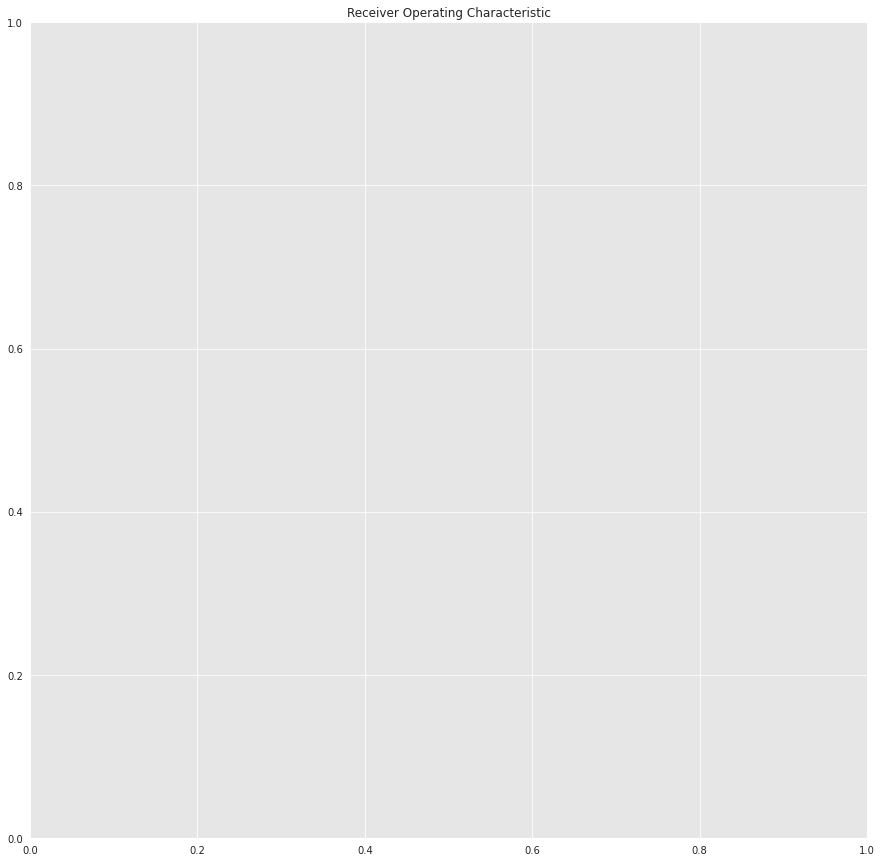

<class 'numpy.ndarray'>
 1    1006
-1     138
Name: anomaly, dtype: int64


TypeError: ignored

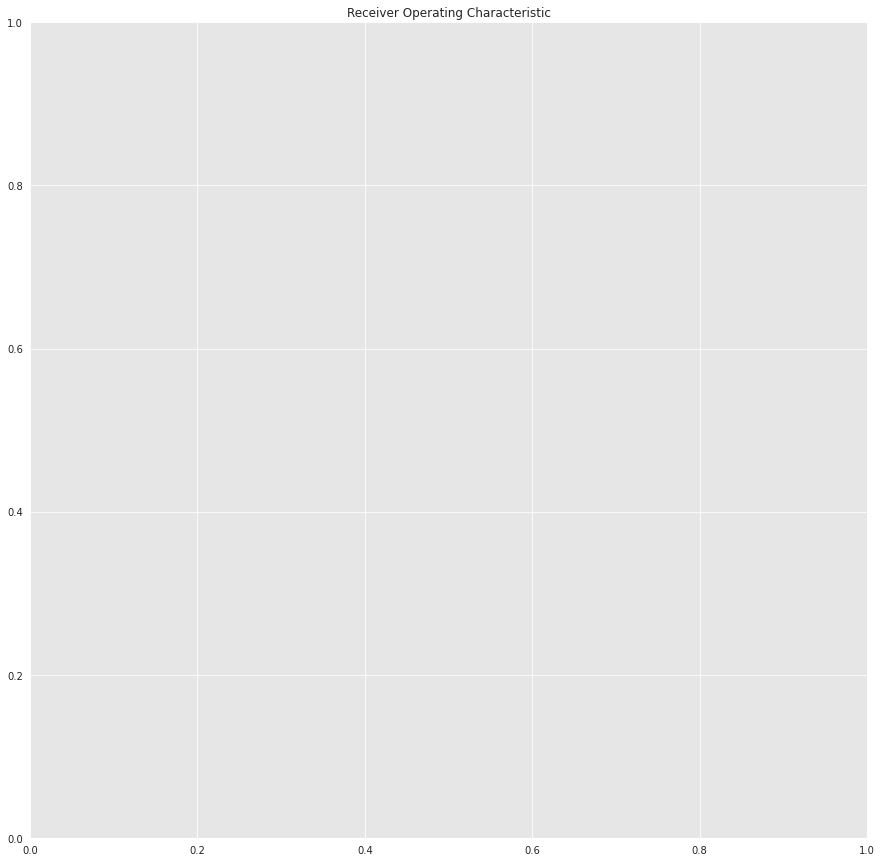

<class 'numpy.ndarray'>
 1    1006
-1     138
Name: anomaly, dtype: int64


TypeError: ignored

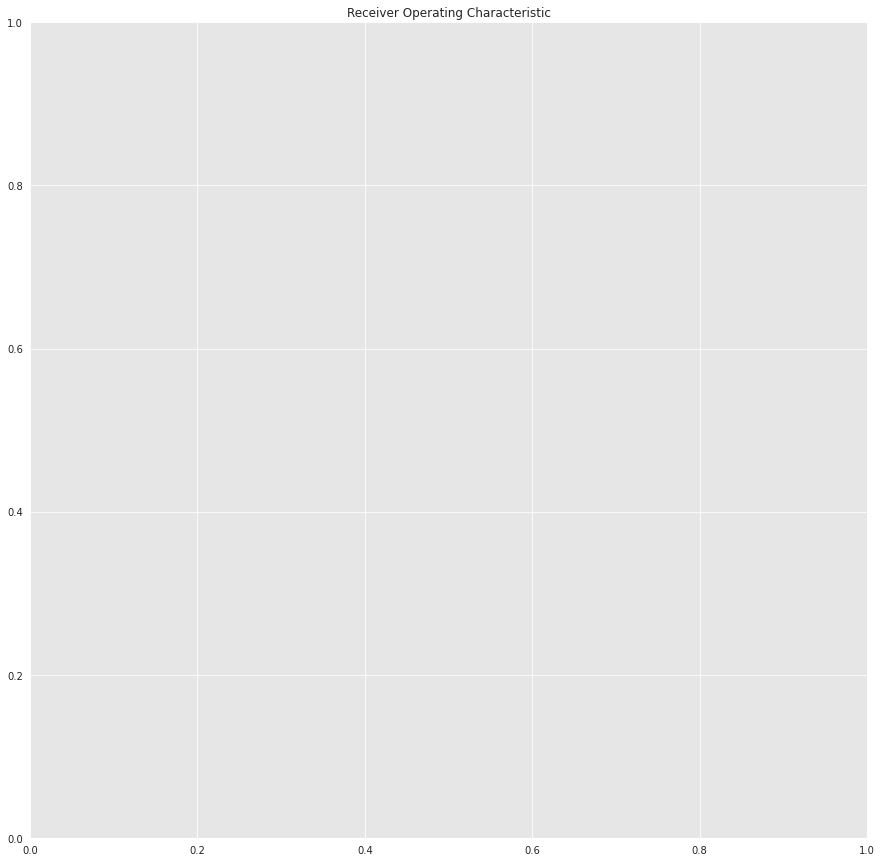

<class 'numpy.ndarray'>
 1    1006
-1     138
Name: anomaly, dtype: int64


TypeError: ignored

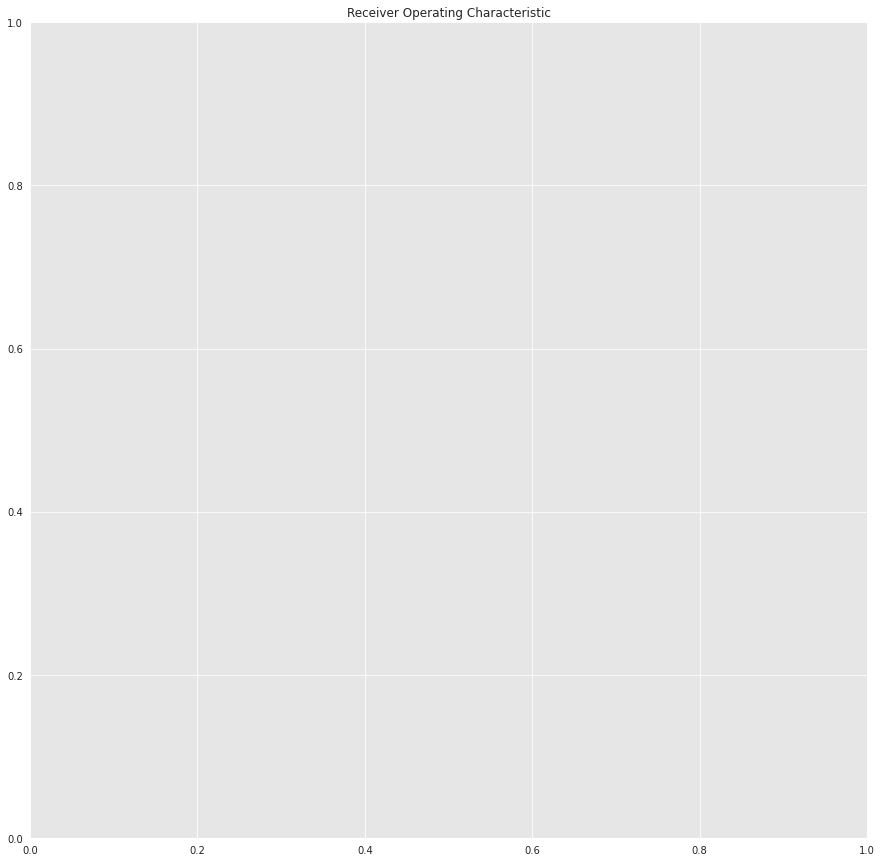

<class 'numpy.ndarray'>
 1    1006
-1     138
Name: anomaly, dtype: int64


TypeError: ignored

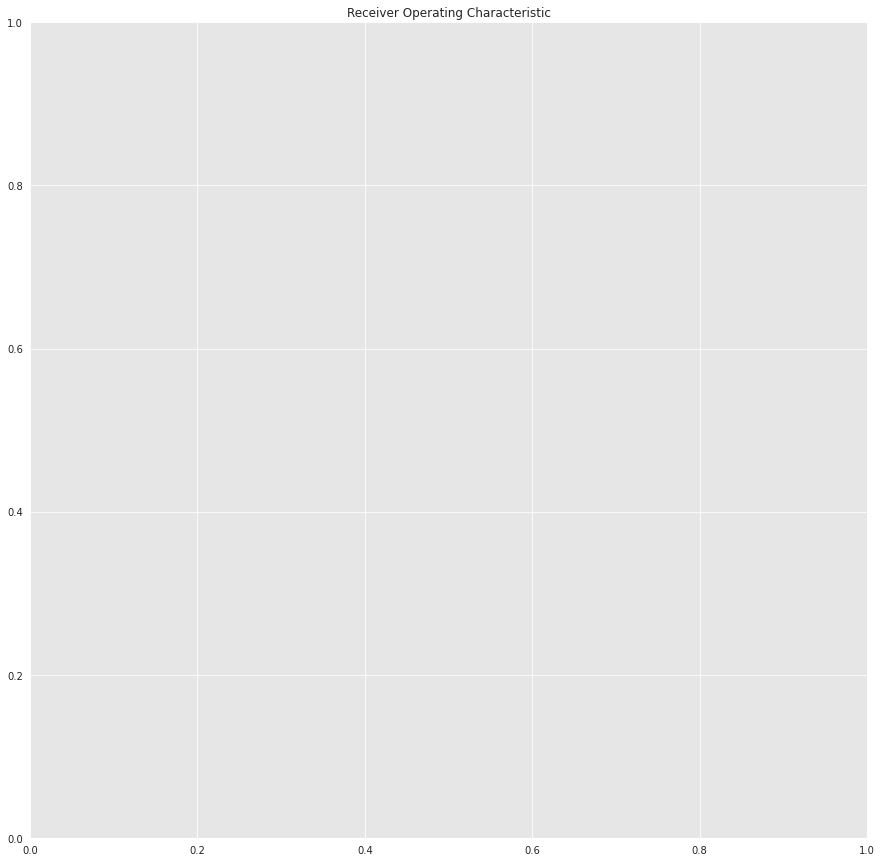

<class 'numpy.ndarray'>
 1    1006
-1     138
Name: anomaly, dtype: int64


TypeError: ignored

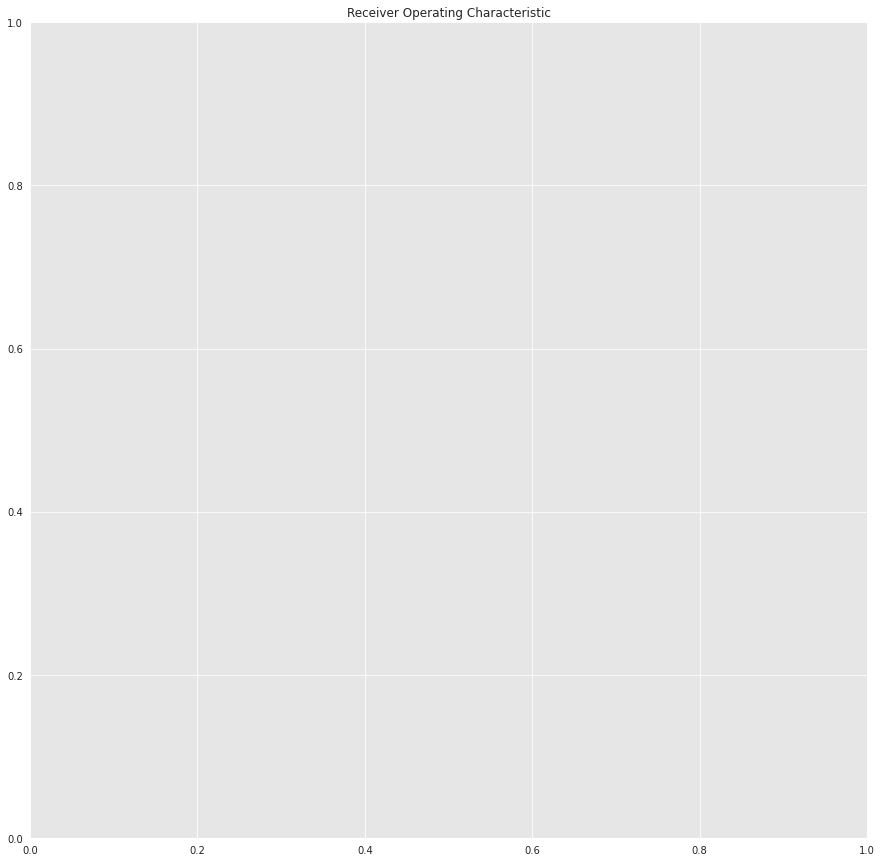

In [0]:

anomalos,normales=mf.iso_tree(X,y_)
features_=[ 'HR12', 'HR23', 'HR34', 'P_E_lg', 'gamm_log', 'Ts_log',  'spectral_index']
while normales.shape[0]  >= 100:
    y_normales=normales['source_type']
    normales_=normales[features_]
    y_anomalos=anomalos['source_type']
    anomalos_=anomalos[features_]
    clasificadores=[tree_model,LR_model,Forest_model, SVM_model,GBC_model, XGB_model]
    mf.ROC_multiple(XGB_model,anomalos_,y_anomalos)
    #tmp_df=plot_pre_rec(Forest_model,anomalos_,y_anomalos,0.6,0.6)
    anomalos,normales=mf.iso_tree(normales_,y_normales)    

    #print(normales.shape[0])
print("Programa terminado")